In [ ]:
!pip install cmake==3.18.4
!pip install MulticoreTSNE
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: cmake
    Found existing installation: cmake 3.25.2
    Uninstalling cmake-3.25.2:
      Successfully uninstalled cmake-3.25.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp39-cp39-linux_x86_64.whl size=64719 sha256=a8d6e2179f86c65b5a84d670ec8a1aea489100c96397f41c7dfc6dc02811f633
  Stored in directory: /root/.cache/pip/wheels/7a/73/20/f7617531f6ee50f6a70d2a06721a6c95ca5907d0b3b2ebd1fa
Successfully built MulticoreTSNE
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [ ]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, AffinityPropagation
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.metrics import *
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
import umap
import time
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
digits = load_digits()

In [ ]:
x = digits.data.copy()

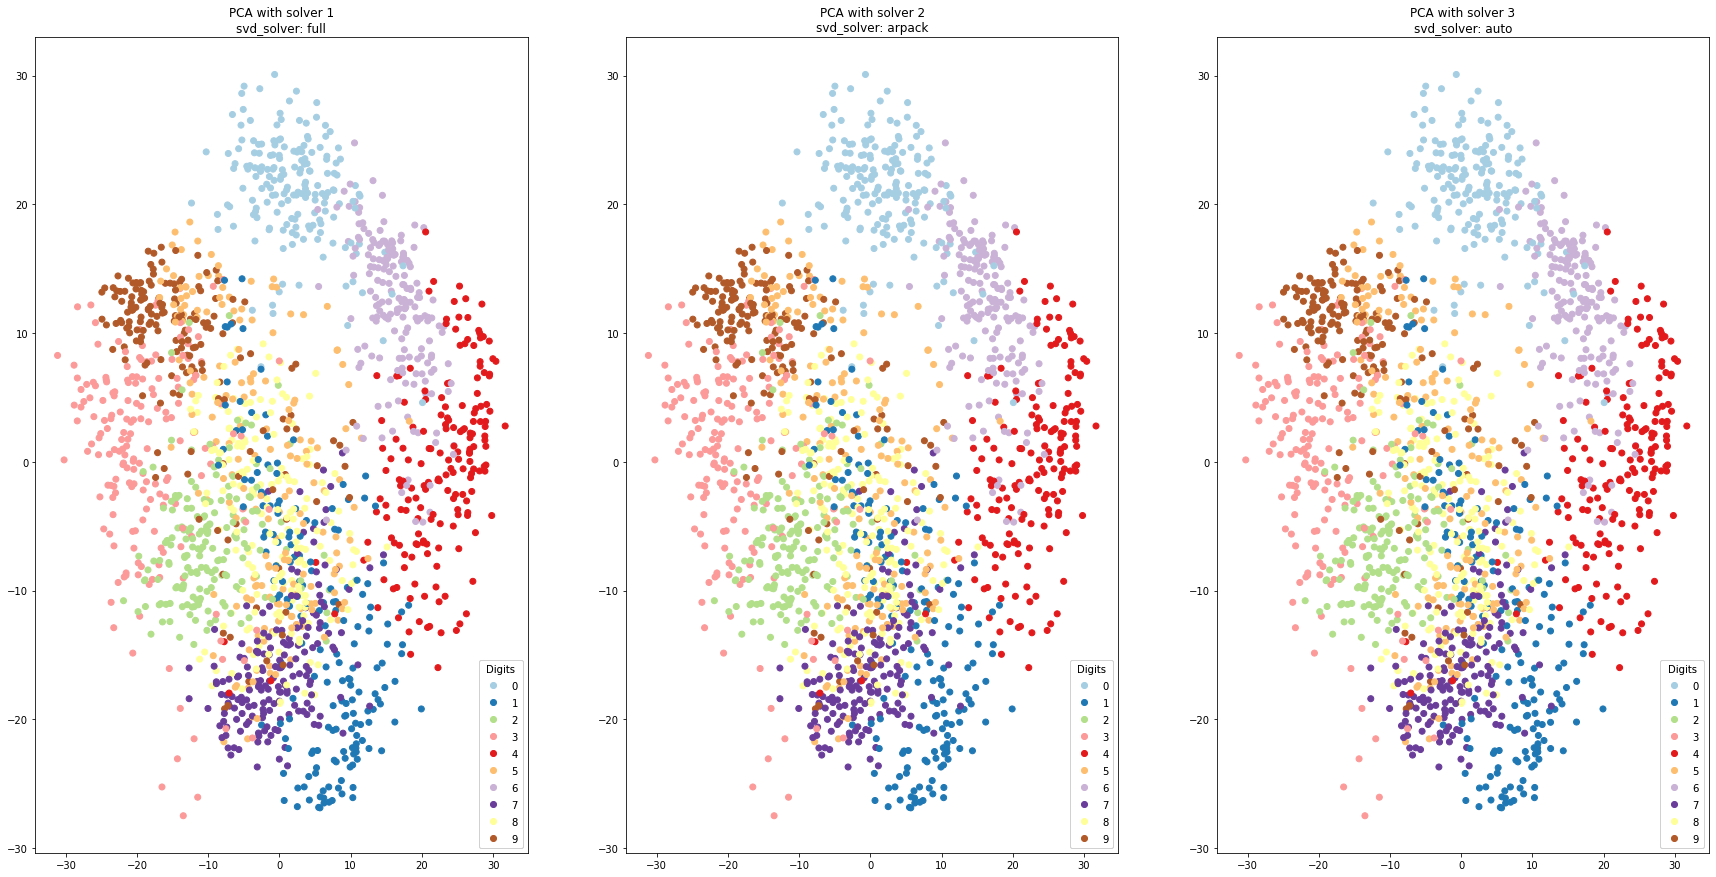

In [ ]:
params = [
    {'svd_solver': 'full'},
    {'svd_solver': 'arpack'},
    {'svd_solver': 'auto'}
]

pca_data = []
for p in params:
    pca_data.append(PCA(n_components=2, random_state=42, **p).fit_transform(x))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i, p in enumerate(params):
    ax = axes[i]
    scatter = ax.scatter(pca_data[i][:, 0], pca_data[i][:, 1], c=digits.target, cmap='Paired')
    title = f"PCA with solver {i+1}\n"
    title += '\n'.join([f"{k}: {v}" for k, v in p.items()])
    ax.set_title(title)
    legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
    ax.add_artist(legend)

plt.show()

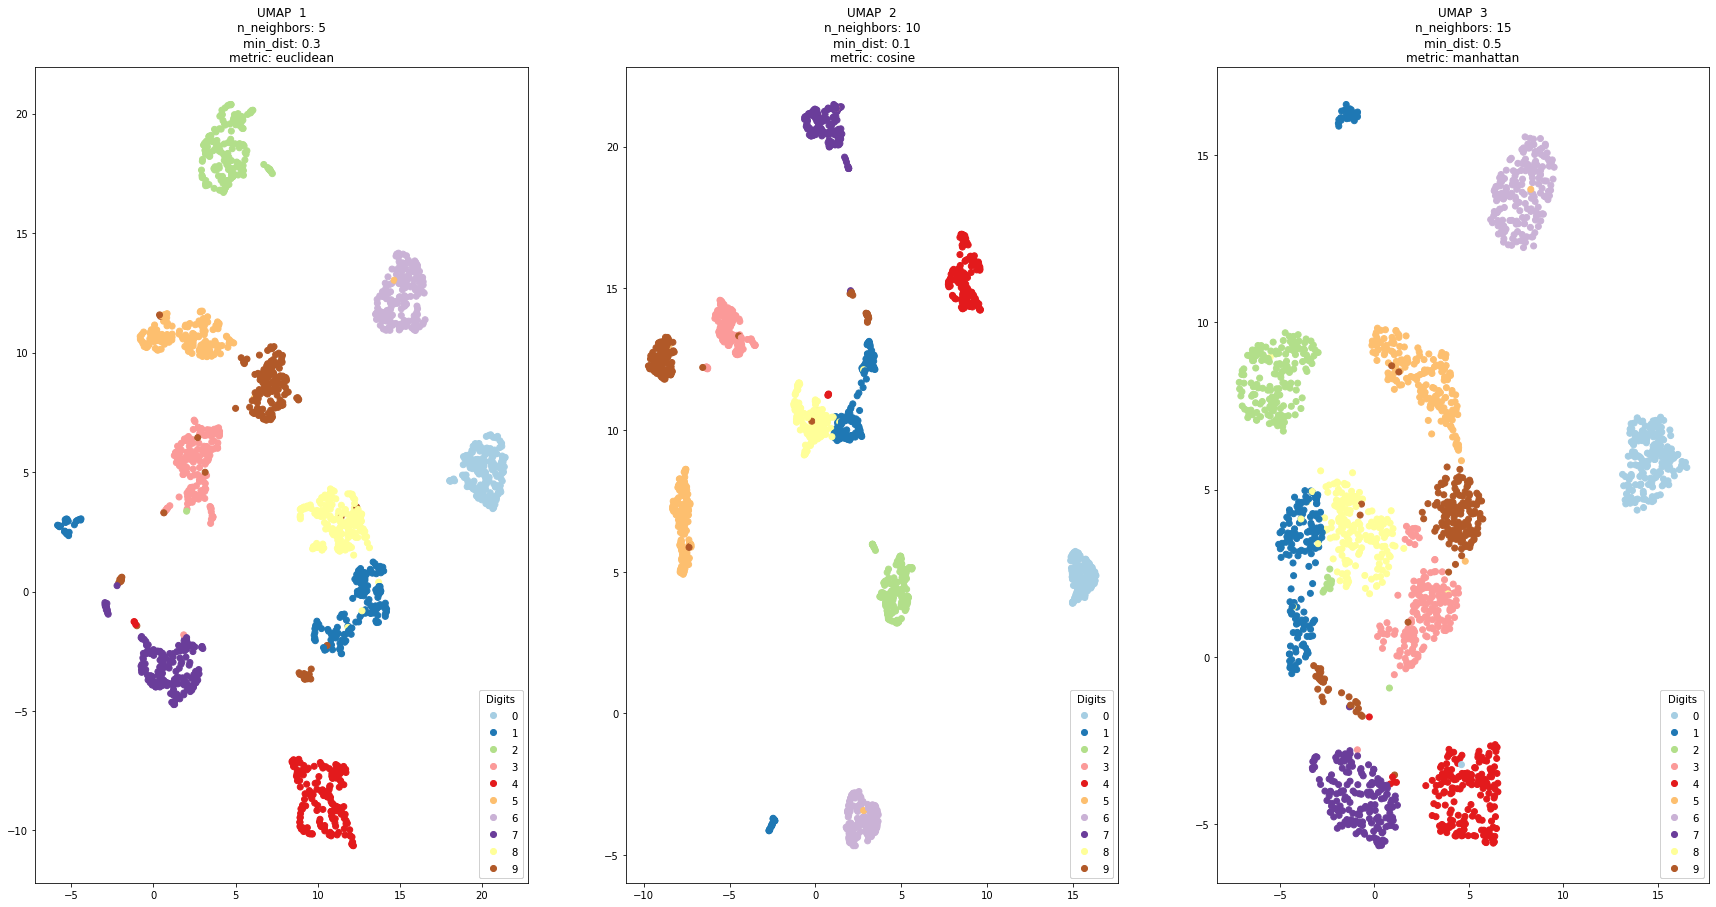

In [ ]:
params = [
    {'n_neighbors': 5, 'min_dist': 0.3, 'metric': 'euclidean'},
    {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'cosine'},
    {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'manhattan'}
]

umap_data = []
for p in params:
    umap_data.append(umap.UMAP(n_components=2, random_state=42, **p).fit_transform(x))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i, p in enumerate(params):
    ax = axes[i]
    scatter = ax.scatter(umap_data[i][:, 0], umap_data[i][:, 1], c=digits.target, cmap='Paired')
    title = f"UMAP  {i+1}\n"
    title += '\n'.join([f"{k}: {v}" for k, v in p.items()])
    ax.set_title(title)
    legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
    ax.add_artist(legend)

plt.show()


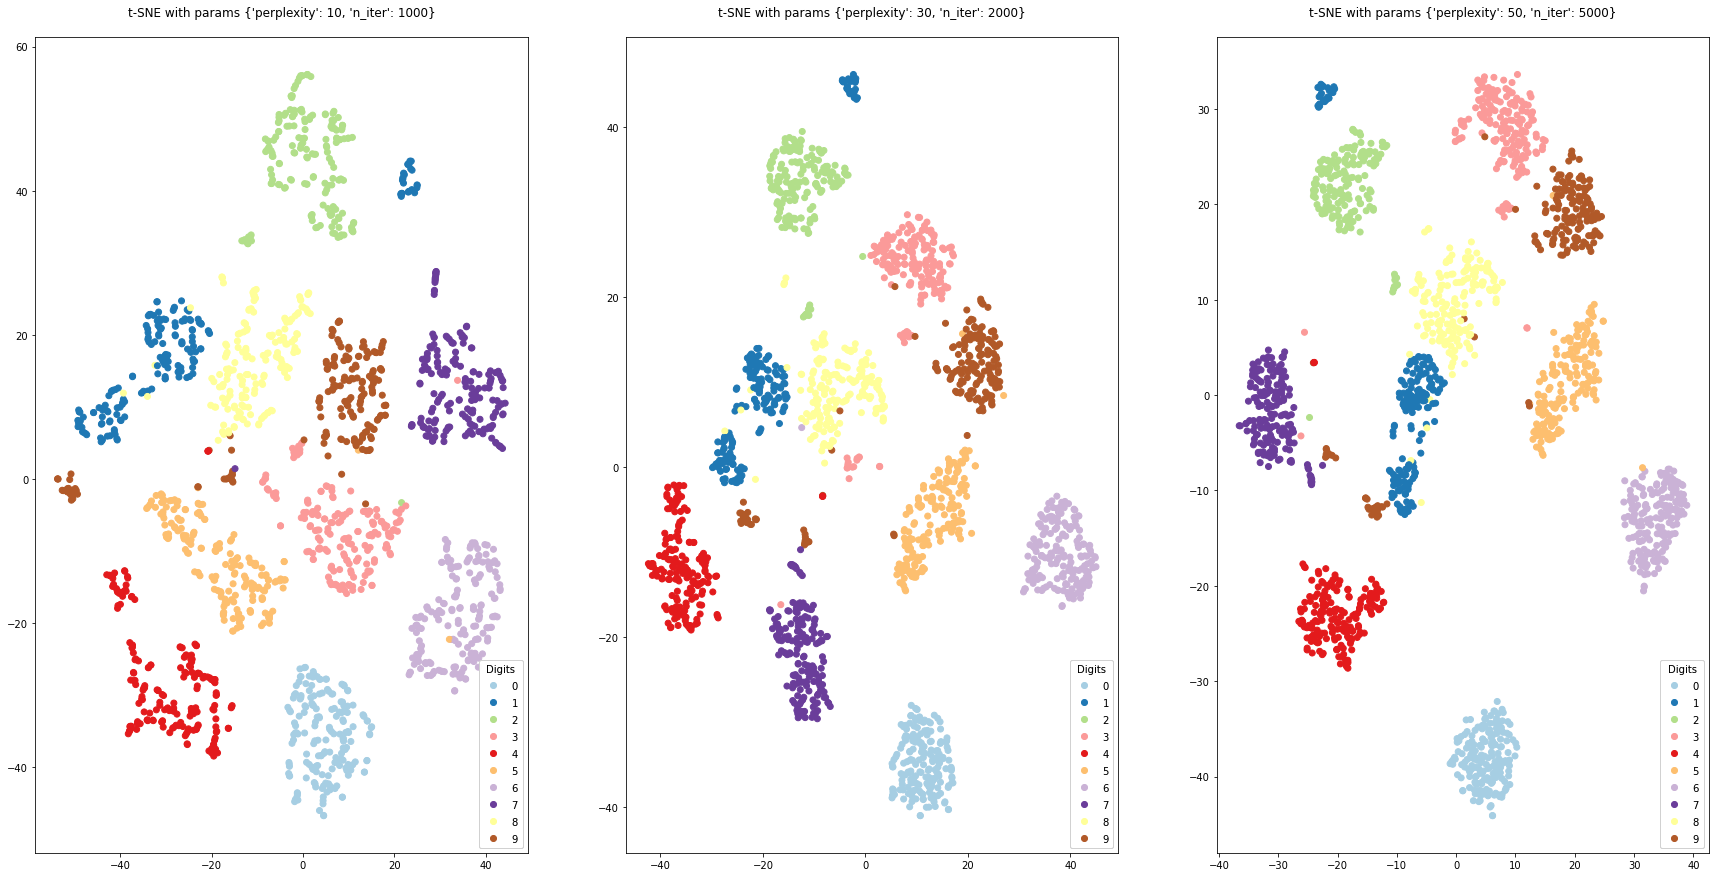

In [ ]:
params = [
    {'perplexity': 10, 'n_iter': 1000},
    {'perplexity': 30, 'n_iter': 2000},
    {'perplexity': 50, 'n_iter': 5000}
]

tsne_data = []

for p in params:
    tsne_data.append(TSNE(n_components=2, random_state=42, **p).fit_transform(x))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i, p in enumerate(params):
    ax = axes[i]
    scatter = ax.scatter(tsne_data[i][:, 0], tsne_data[i][:, 1], c=digits.target, cmap='Paired')
    title = f"t-SNE with params {p}\n"
    ax.set_title(title)
    legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
    ax.add_artist(legend)

plt.show()

In [ ]:
def plot_clusters_digits(data, algorithm, args, kwds):
    """
      Plots clusters found by a clustering algorithm for a dataset of digits with dimensionality reduction
      and calculate three metrics for evaluation the quality of clustering

      Args:

      data:  array-like, shape (n_samples, n_features), the dataset of digits to cluster
      algorithm: class, the clustering algorithm to use
      args: tuple, the arguments to pass to the clustering algorithm
      kwds: dict, the keyword arguments to pass to the clustering algorithm

      Return: visualisation of the model results
      """
    start_time = time.time()
    data = digits.data
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()

    #Calculate clustering metrics
    silhouette = silhouette_score(data, labels)
    ami = adjusted_mutual_info_score(digits.target, labels)
    ari = adjusted_rand_score(digits.target, labels)

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42).fit_transform(data)

    plt.figure(figsize=(20,10))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-40, 20, 'Clustering took {:.4f} s\nSilhouette score: {:.4f}\nAMI score: {:.4f}\nARI score: {:.4f}'.format(end_time - start_time, silhouette, ami, ari), fontsize=14)
    plt.show()

    return silhouette, ami, ari

In [ ]:
def plot_clusters_reduced_data(data, algorithm, args, kwds):
    """
    Plots clusters found by a clustering algorithm for a dataset of digits
    and calculatethree metrics fro evaluation the quality of clustering

    Args:

      data:  array-like, shape (n_samples, n_features), the dataset of digits to cluster
      algorithm: class, the clustering algorithm to use
      args: tuple, the arguments to pass to the clustering algorithm
      kwds: dict, the keyword arguments to pass to the clustering algorithm

    Return: visualisation of the model results
    """
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()

    #Calculate clustering metrics
    silhouette = silhouette_score(data, labels)
    ami = adjusted_mutual_info_score(digits.target, labels)
    ari = adjusted_rand_score(digits.target, labels)

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.figure(figsize=(20,10))
    plt.scatter(data[:, 0], data[:, 1], c=colors)
    plt.title('Clusters found by {} with Dimensionality reduction'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-40, 20, 'Clustering took {:.4f} s\nSilhouette score: {:.4f}\nAMI score: {:.4f}\nARI score: {:.4f}'.format(end_time - start_time, silhouette, ami, ari), fontsize=14)

    plt.show()

    return silhouette, ami, ari

# KMEANS

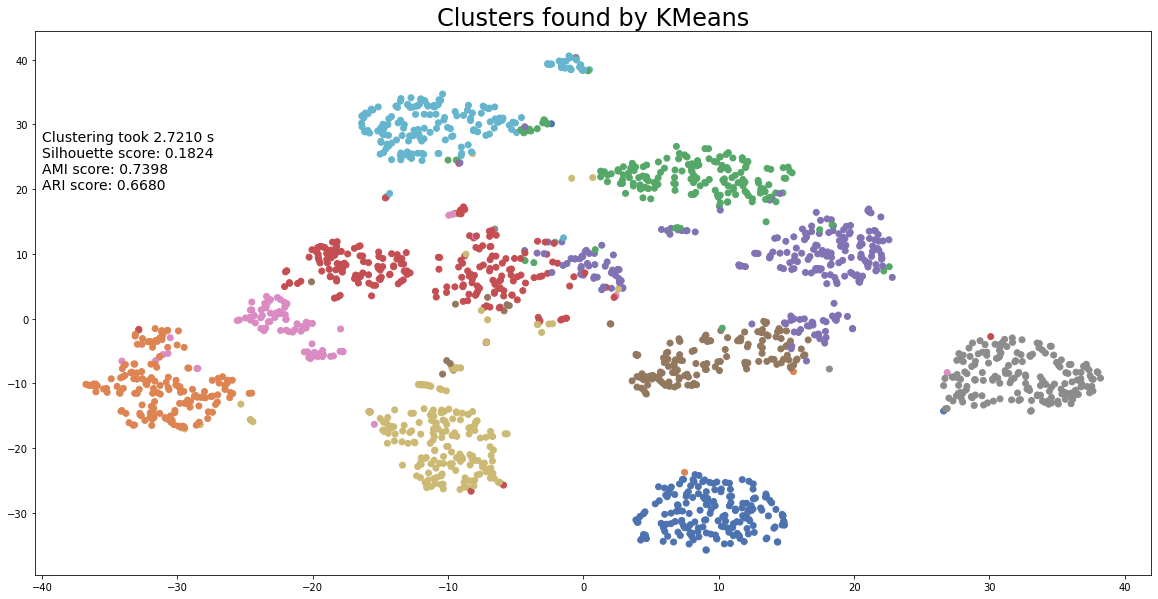

In [ ]:
silhouette, ami, ari = plot_clusters_digits(digits.data, KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_without_dimred = [silhouette, ami, ari]

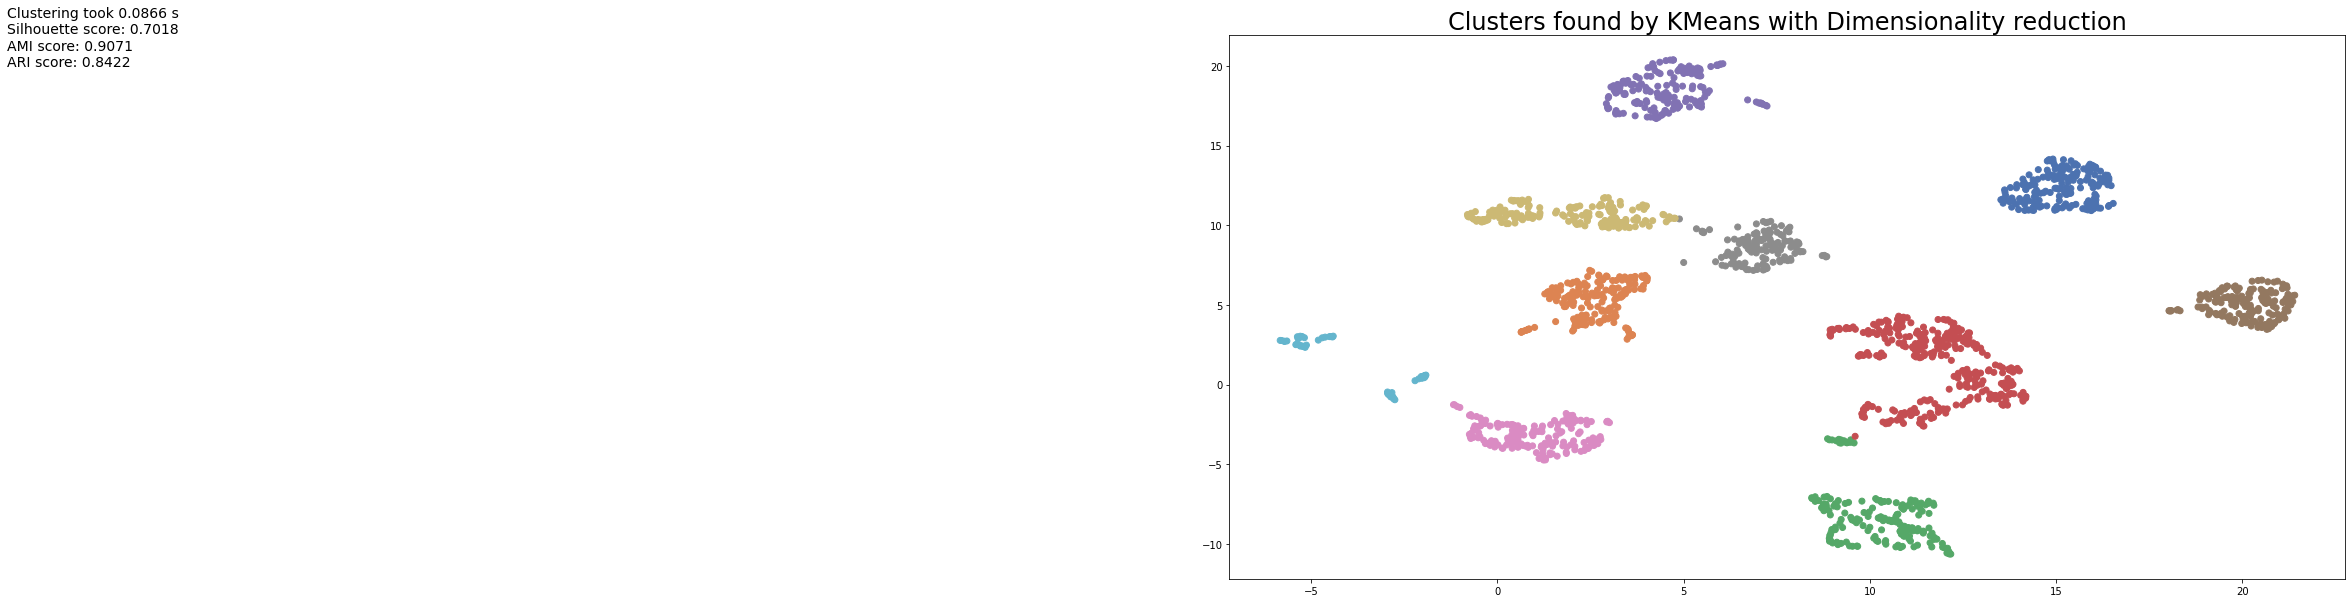

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[0], KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_with_umap_euclidean = [silhouette, ami, ari]

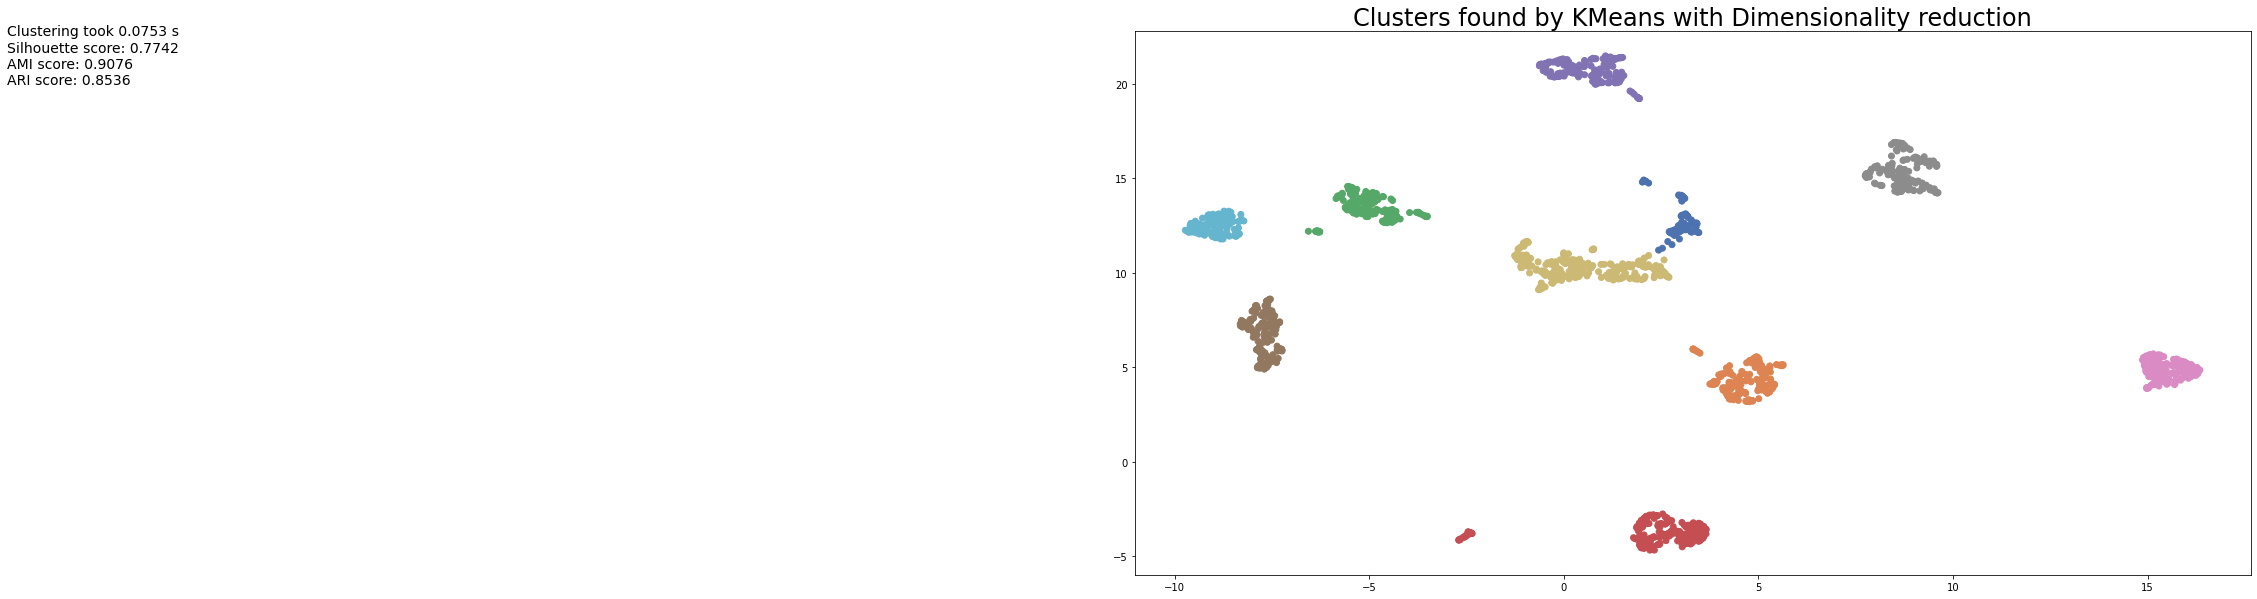

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[1], KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_with_umap_cosine = [silhouette, ami, ari]

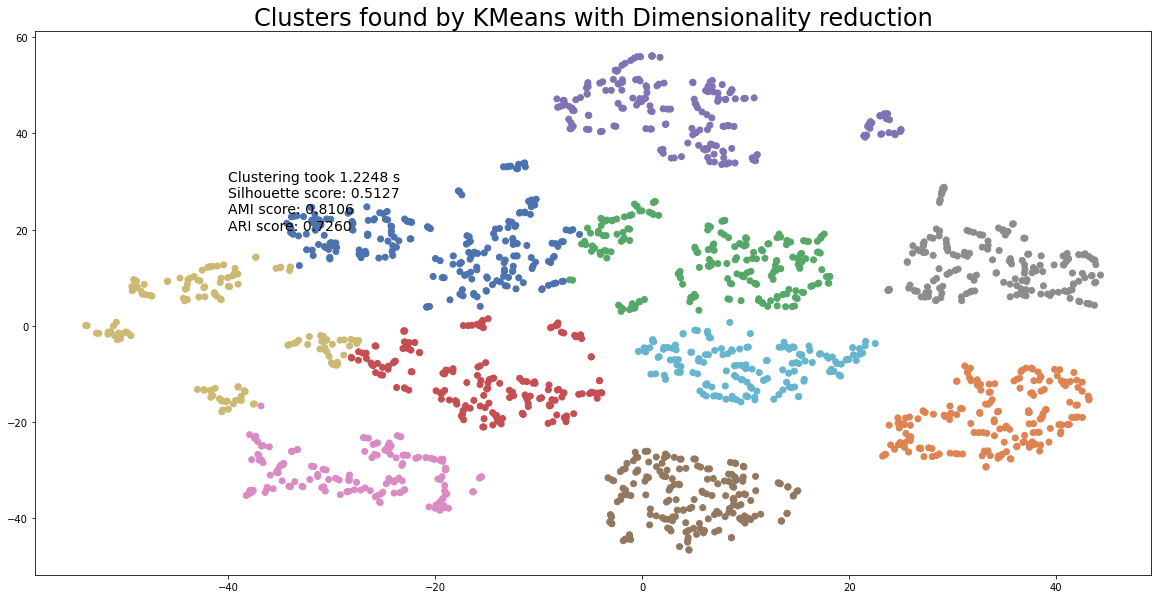

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[0], KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_with_tsne_10 = [silhouette, ami, ari]

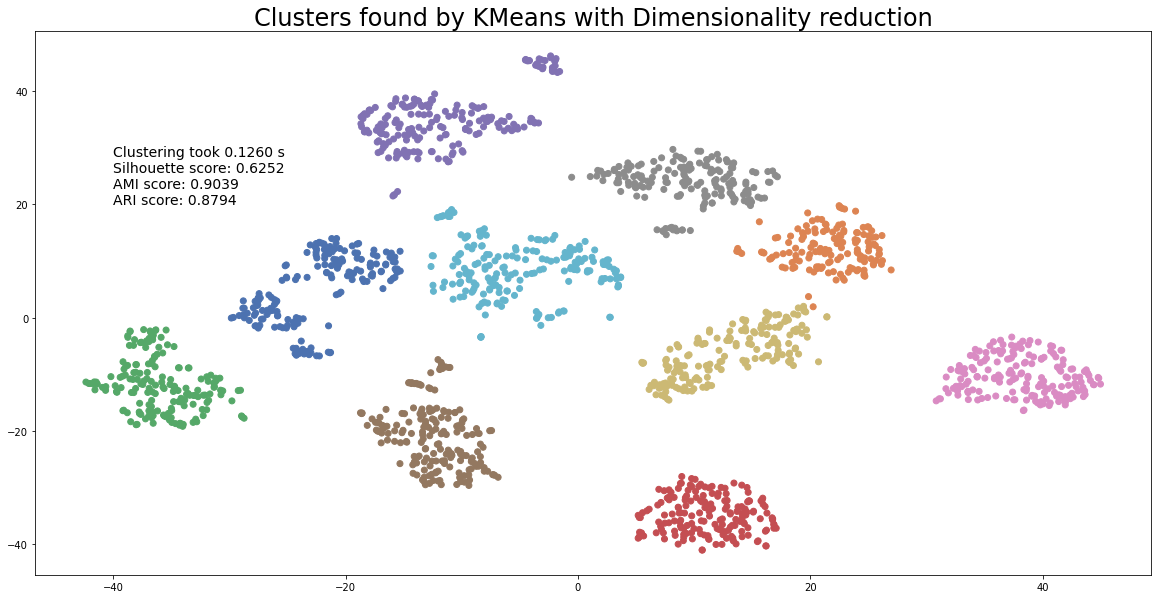

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[1], KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_with_tsne_30 = [silhouette, ami, ari]

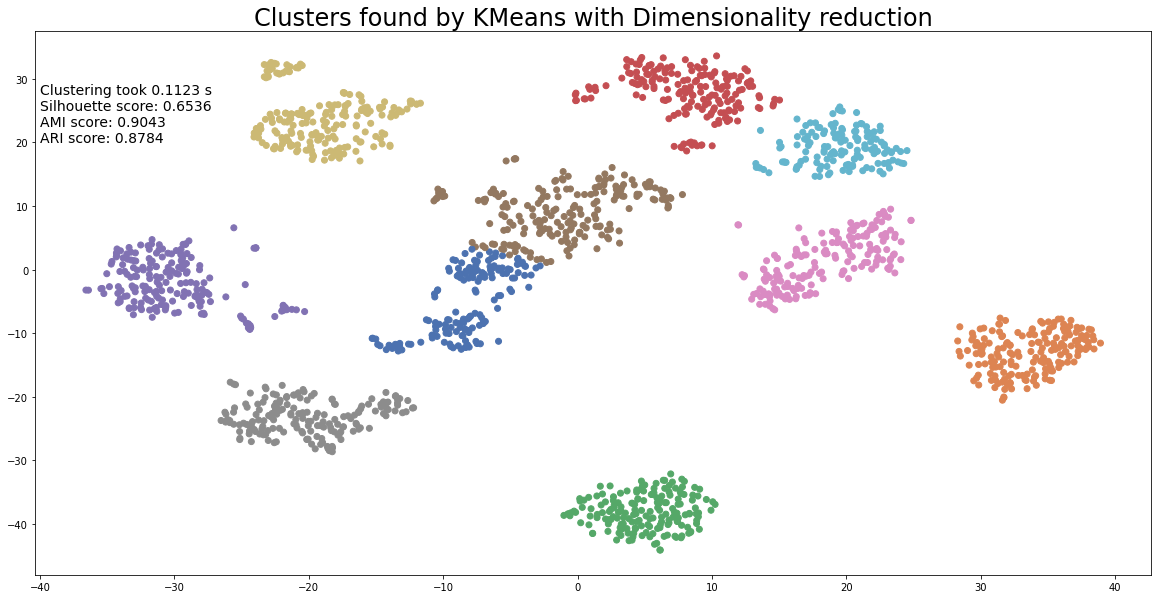

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[2], KMeans, (), {'n_clusters':10, 'random_state':42, 'n_init': 15, 'max_iter': 400})
KMeans_with_tsne_50 = [silhouette, ami, ari]

# Birch

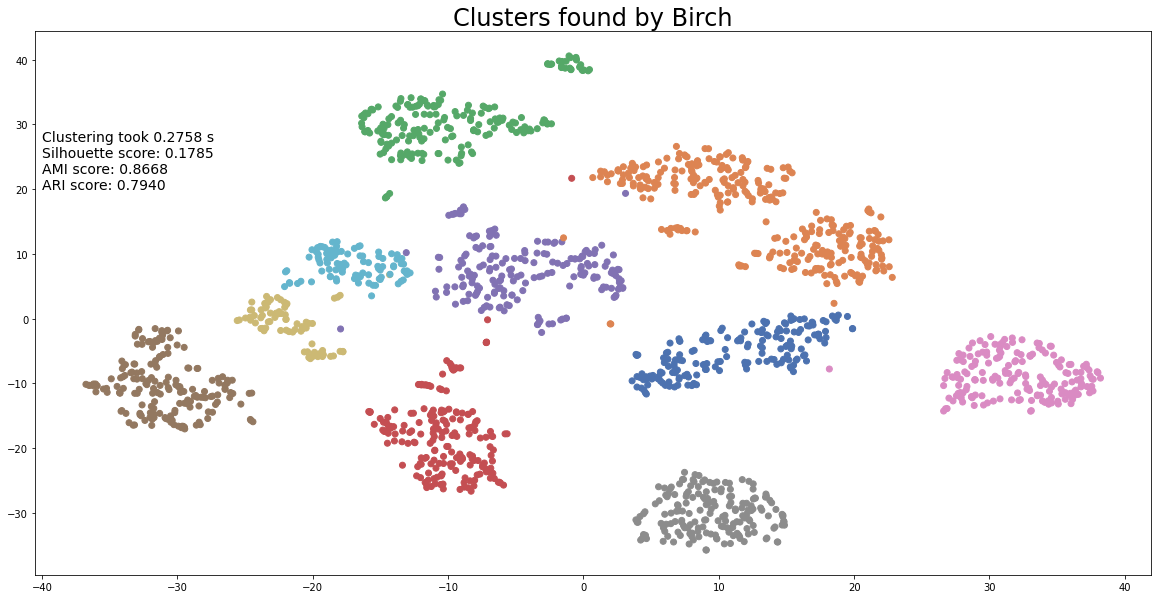

In [ ]:
silhouette, ami, ari = plot_clusters_digits(digits.data, Birch, (), {'n_clusters': 10})
birch_without_dimred = [silhouette, ami, ari]

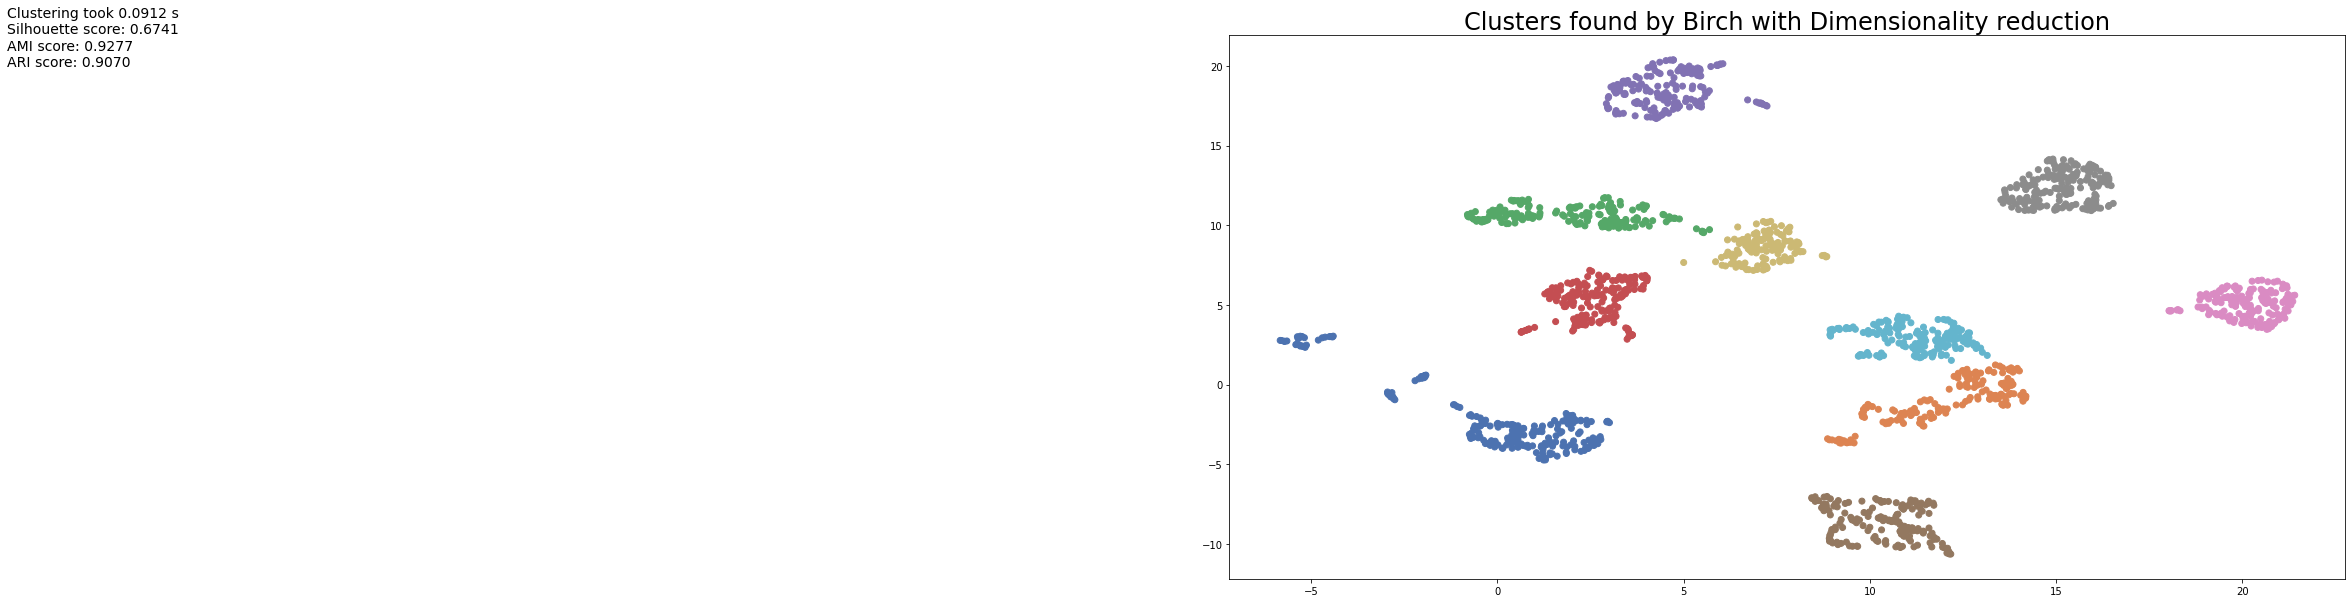

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[0], Birch, (), {'n_clusters': 10})
birch_with_umap_euclidean = [silhouette, ami, ari]

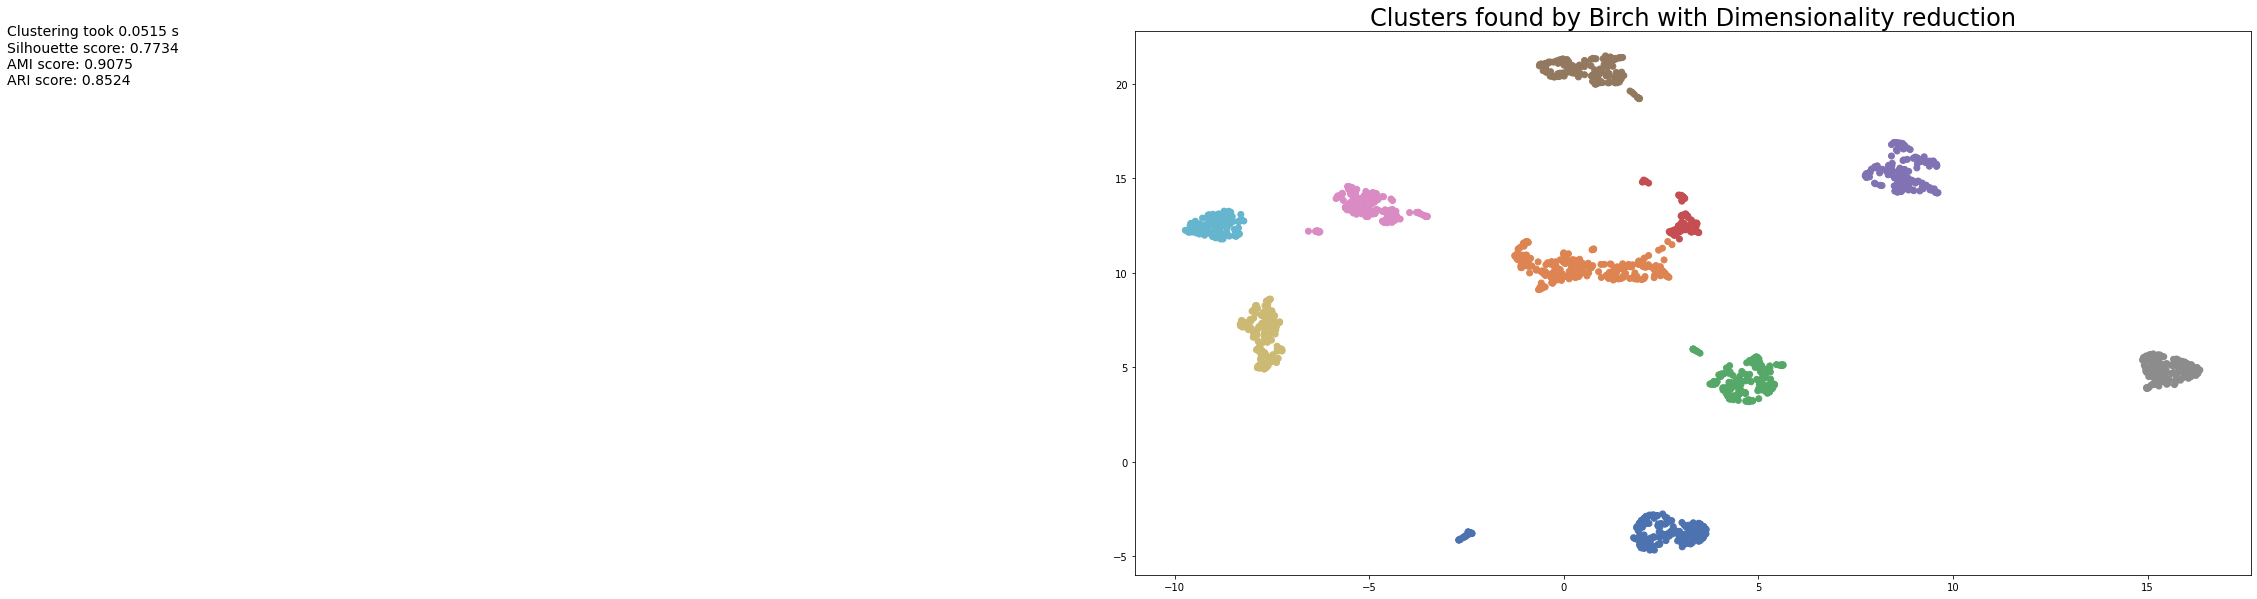

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[1], Birch, (), {'n_clusters': 10})
birch_with_umap_cosine = [silhouette, ami, ari]

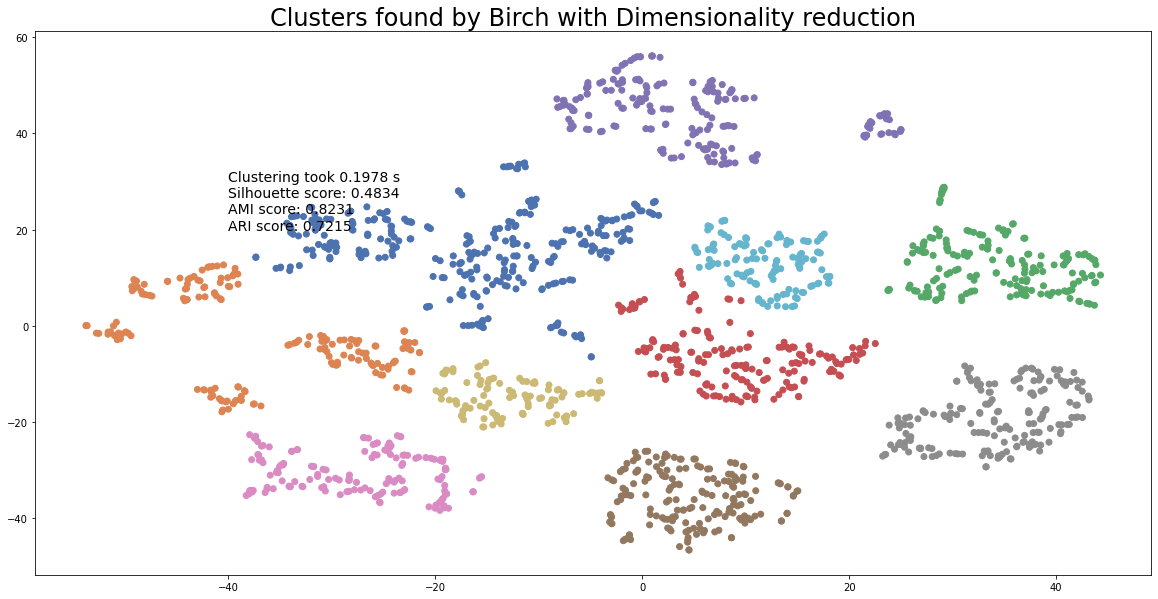

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[0], Birch, (), {'n_clusters': 10})
birch_with_tsne_10 = [silhouette, ami, ari]

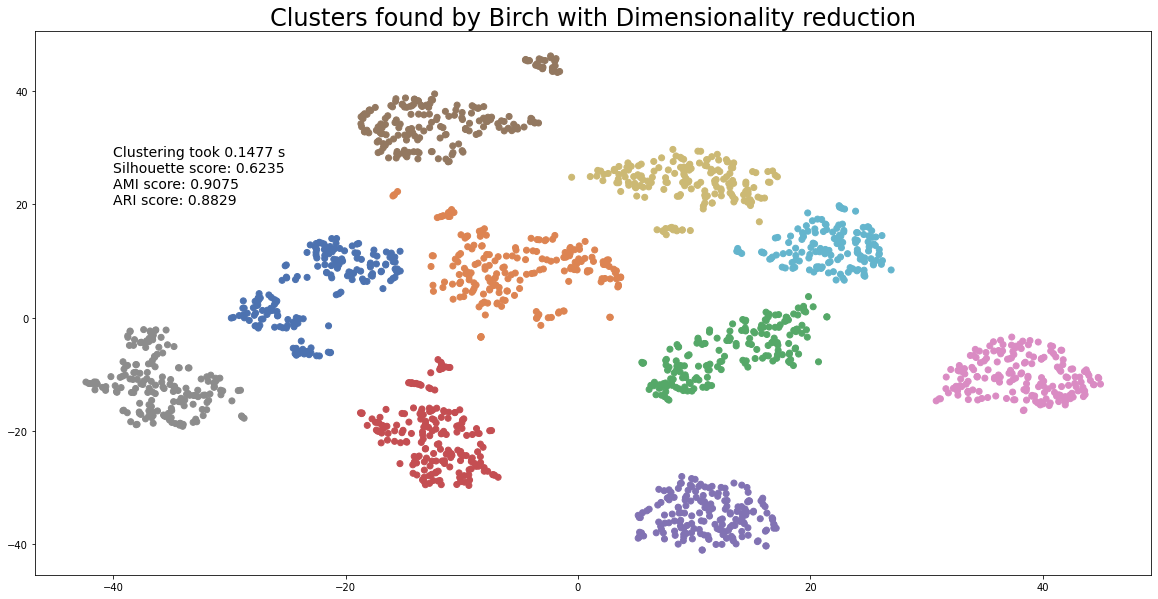

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[1], Birch, (), {'n_clusters': 10})
birch_with_tsne_30 = [silhouette, ami, ari]

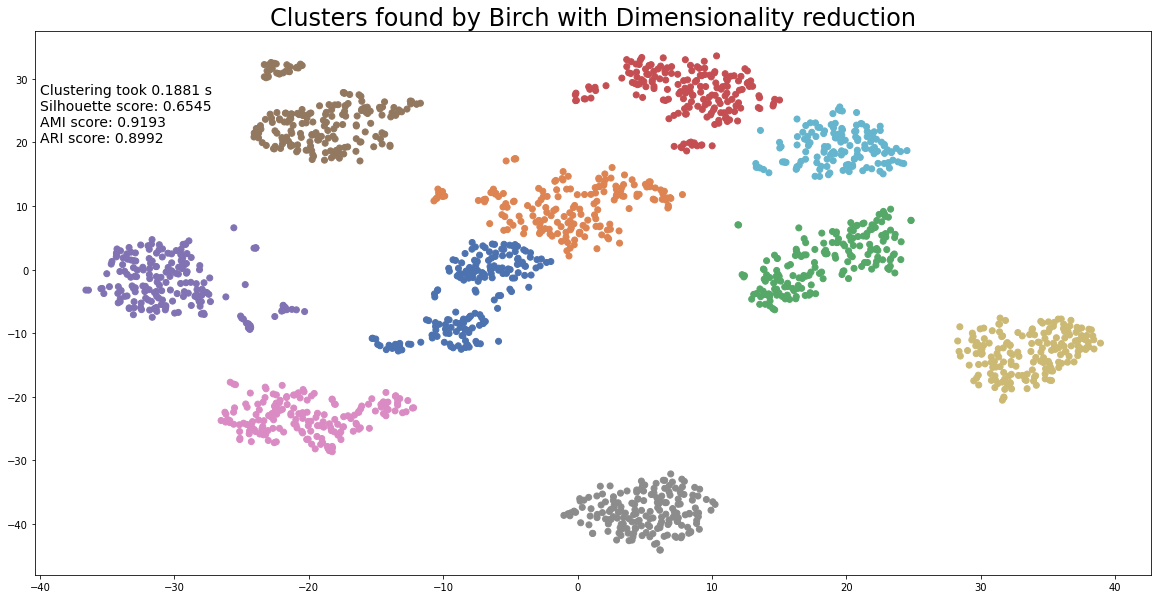

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[2], Birch, (), {'n_clusters': 10})
birch_with_tsne_50 = [silhouette, ami, ari]

# AgglomerativeClustering

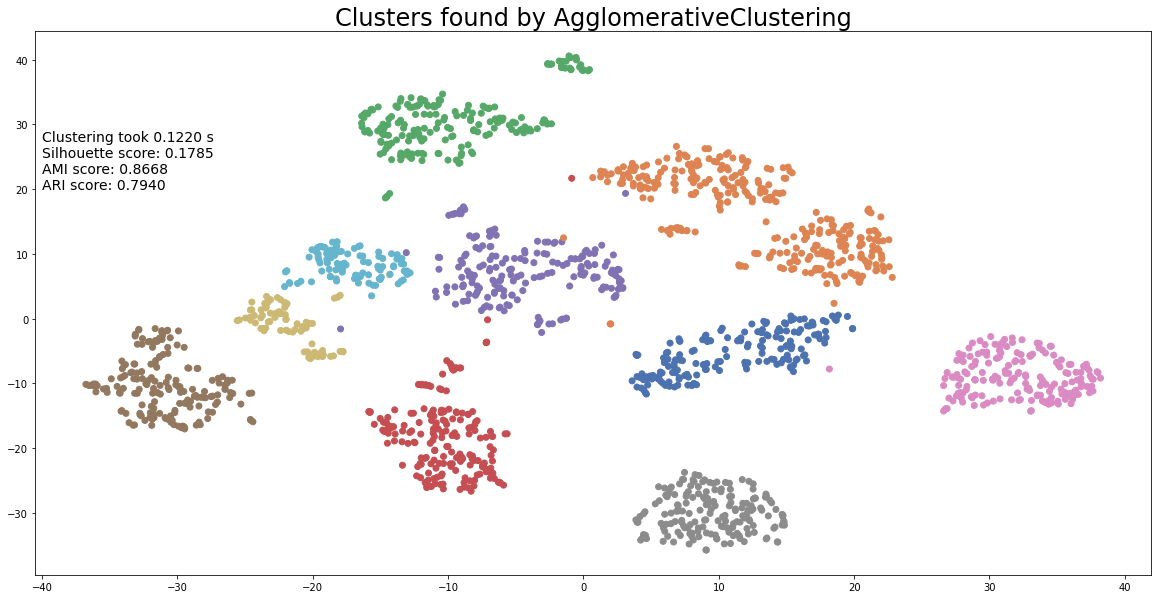

In [ ]:
silhouette, ami, ari = plot_clusters_digits(digits.data, AgglomerativeClustering, (), {'n_clusters':10})
agglcust_without_dimred = [silhouette, ami, ari]

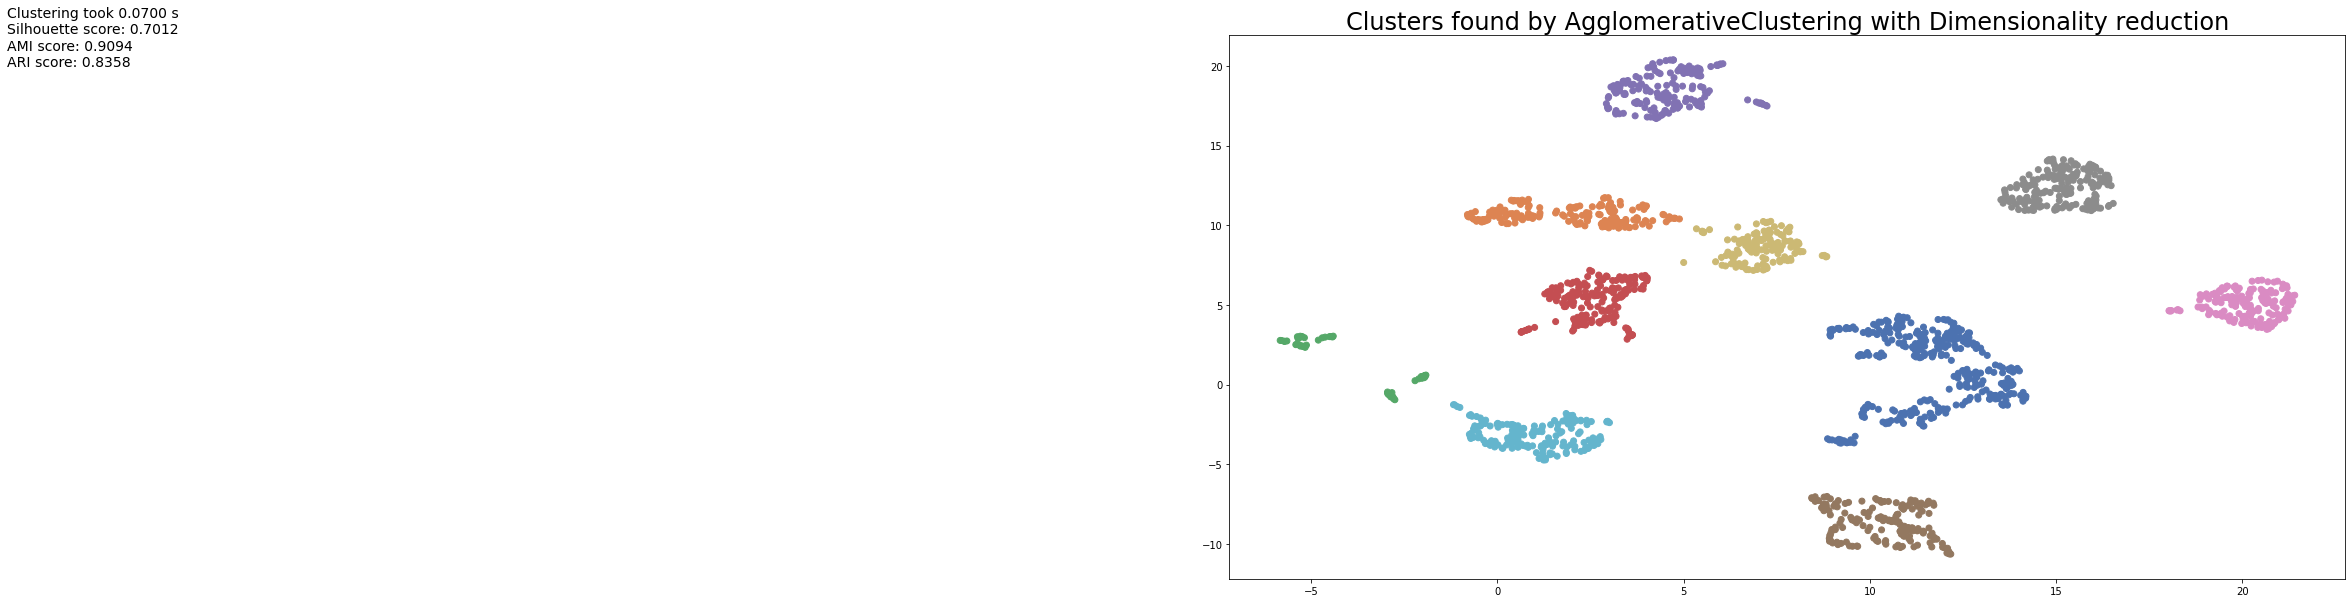

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[0], AgglomerativeClustering, (), {'n_clusters':10})
agglcust_with_umap_euclidean = [silhouette, ami, ari]

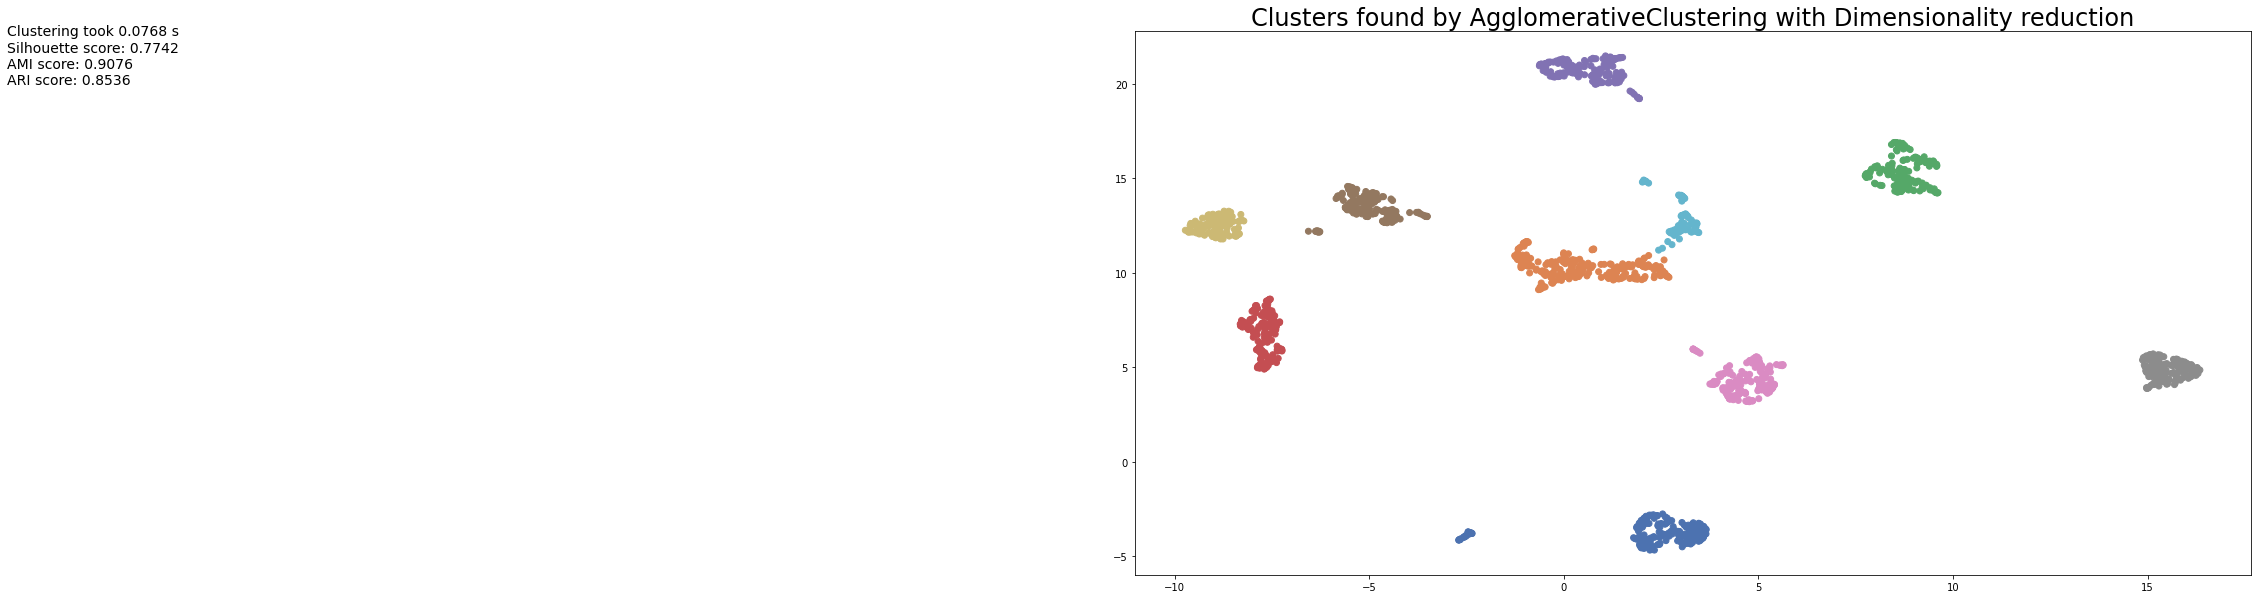

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[1], AgglomerativeClustering, (), {'n_clusters':10})
agglcust_with_umap_cosine = [silhouette, ami, ari]

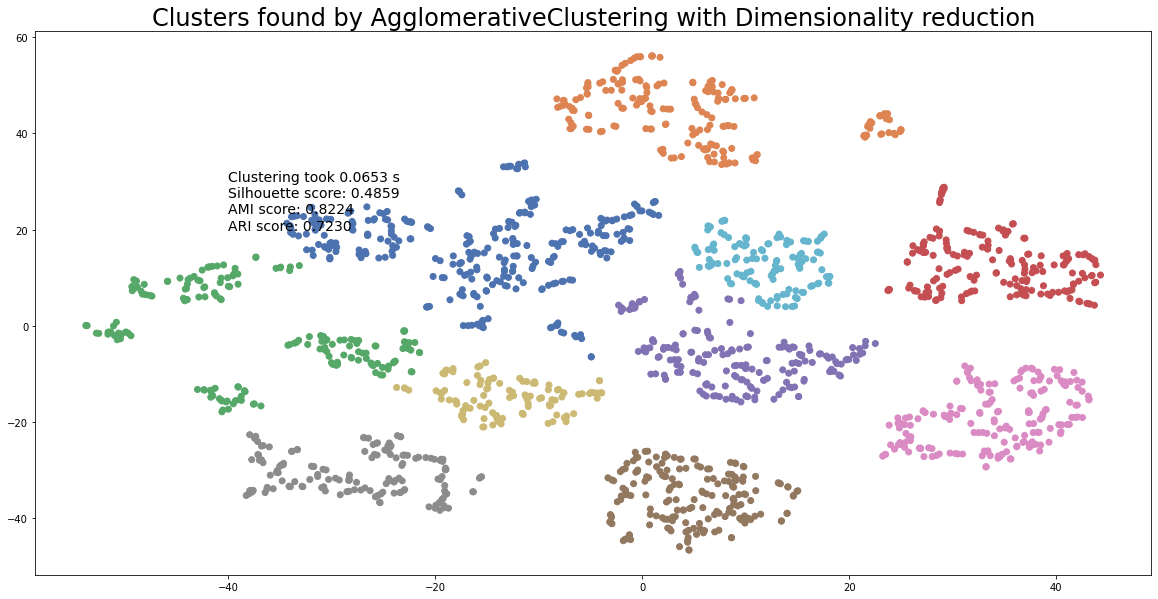

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[0], AgglomerativeClustering, (), {'n_clusters':10})
agglcust_with_tsne_10 = [silhouette, ami, ari]

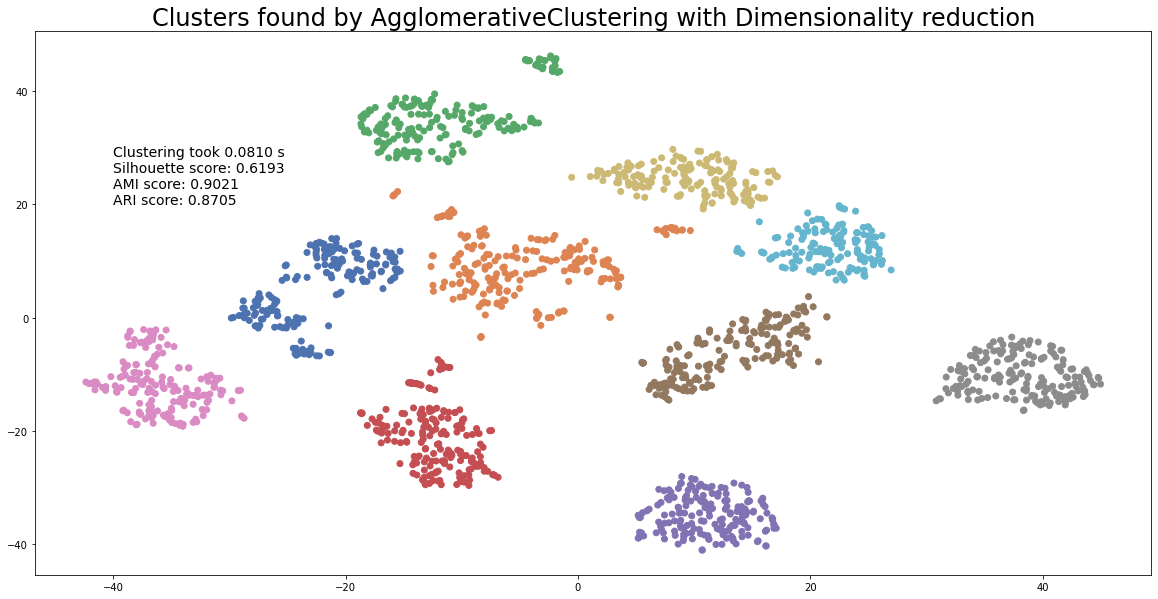

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[1], AgglomerativeClustering, (), {'n_clusters':10})
agglcust_with_tsne_30 = [silhouette, ami, ari]

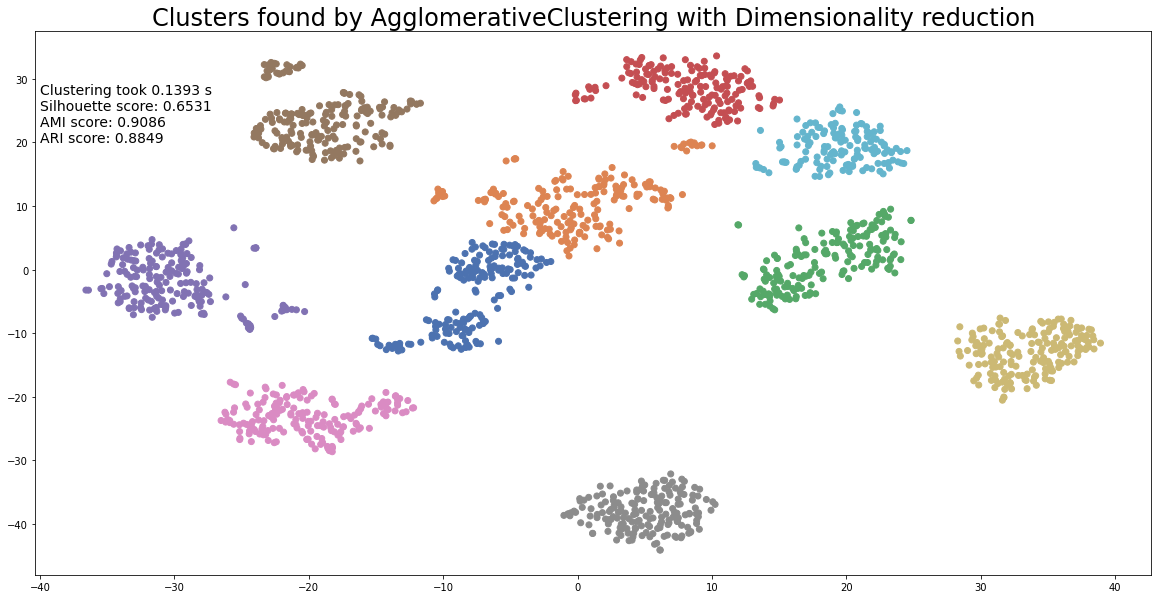

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[2], AgglomerativeClustering, (), {'n_clusters':10})
agglcust_with_tsne_50 = [silhouette, ami, ari]

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
def k_distance(data):
  X = data
  k_values = [3, 4, 5, 6, 7, 8, 9, 10]
  distances = []
  for k in k_values:
      neighbors = NearestNeighbors(n_neighbors=k+1)
      neighbors_fit = neighbors.fit(X)
      dist, ind = neighbors_fit.kneighbors(X)
      distances.append(np.sort(dist[:, k]))

  fig = plt.figure(figsize=(10, 5))
  ax = fig.add_subplot(1, 1, 1)
  for i in range(len(k_values)):
      ax.plot(distances[i], label='k = '+str(k_values[i]))
  ax.set_xlabel('Instance Index')
  ax.set_ylabel('k-Distance')
  ax.legend()
  plt.show()

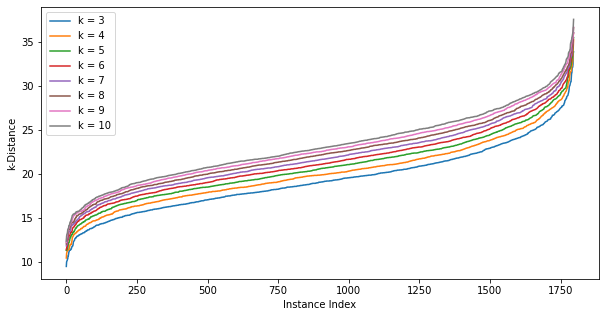

In [ ]:
k_distance(digits.data)

In [ ]:
def evaluate_cluster_quality(predicted_clusters, true_labels):

    silhouette = silhouette_score(digits.data, predicted_clusters)
    ari = adjusted_rand_score(true_labels, predicted_clusters)
    ami = adjusted_mutual_info_score(true_labels, predicted_clusters)

    return {'silhouette': silhouette, 'ARI': ari, 'AMI': ami}

In [ ]:
dbscan = DBSCAN(eps=22, min_samples=7)
dbscan.fit(digits.data)
predicted_clusters = dbscan.fit_predict(digits.data)

evaluate_cluster_quality(predicted_clusters, digits.target)

{'silhouette': 0.09345106717340913,
 'ARI': 0.5507312082746492,
 'AMI': 0.7255993002956882}

In [ ]:
n_clusters_ = len(set(predicted_clusters)) - (1 if -1 in predicted_clusters else 0)
n_noise_ = list(predicted_clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 16
Estimated number of noise points: 302


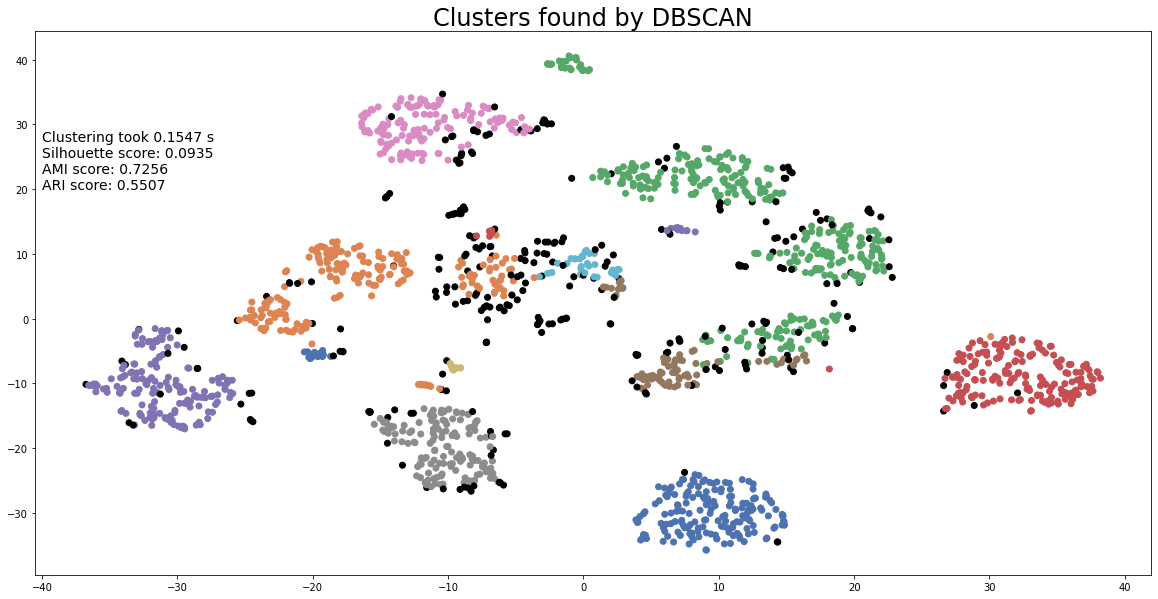

In [ ]:
silhouette, ami, ari = plot_clusters_digits(digits.data, DBSCAN, (), {'eps': 22, 'min_samples': 7})
dbscan_without_dimred = [silhouette, ami, ari]

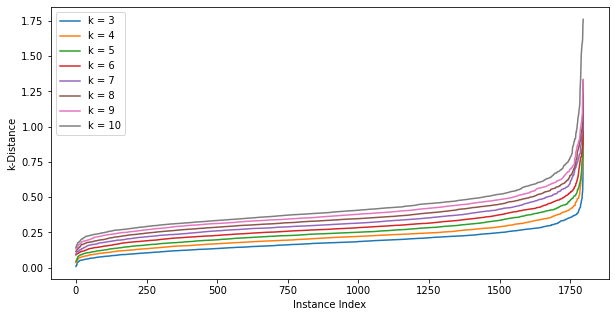

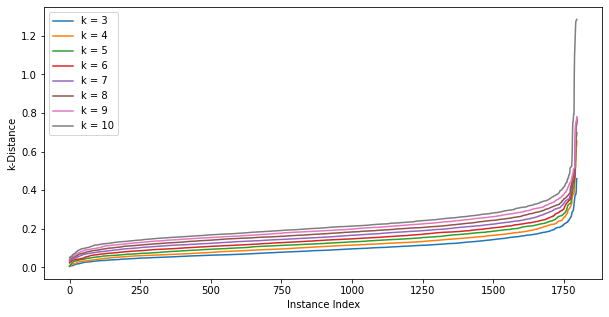

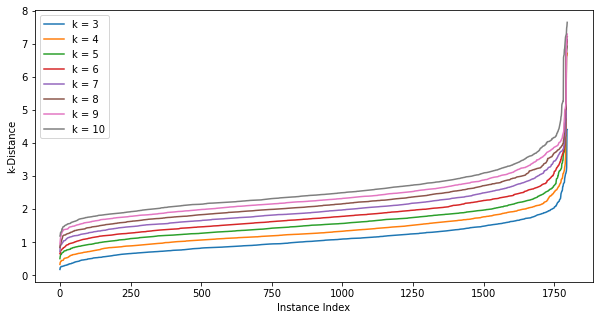

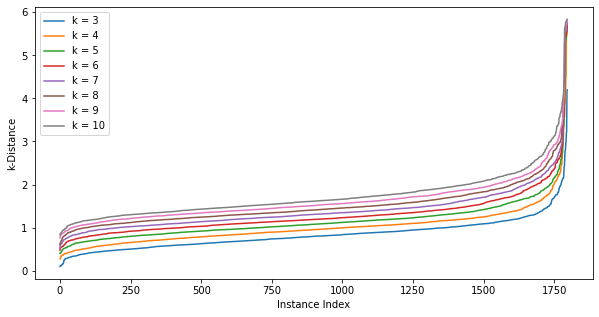

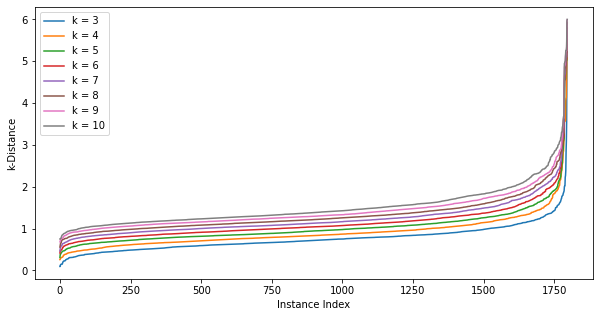

In [ ]:
k_distance(umap_data[0])
k_distance(umap_data[1])
k_distance(tsne_data[0])
k_distance(tsne_data[1])
k_distance(tsne_data[2])

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=7)
dbscan.fit(tsne_data[1])
predicted_clusters = dbscan.fit_predict(tsne_data[0])

evaluate_cluster_quality(predicted_clusters, digits.target)

{'silhouette': 0.1499643507780605,
 'ARI': 0.8655506018808281,
 'AMI': 0.9017008194035685}

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=7)
dbscan.fit(umap_data[0])
predicted_clusters = dbscan.fit_predict(umap_data[0])

evaluate_cluster_quality(predicted_clusters, digits.target)

{'silhouette': 0.07120645330129097,
 'ARI': 0.1830741085916158,
 'AMI': 0.5722552147863346}

In [ ]:
n_clusters_ = len(set(predicted_clusters)) - (1 if -1 in predicted_clusters else 0)
n_noise_ = list(predicted_clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 0


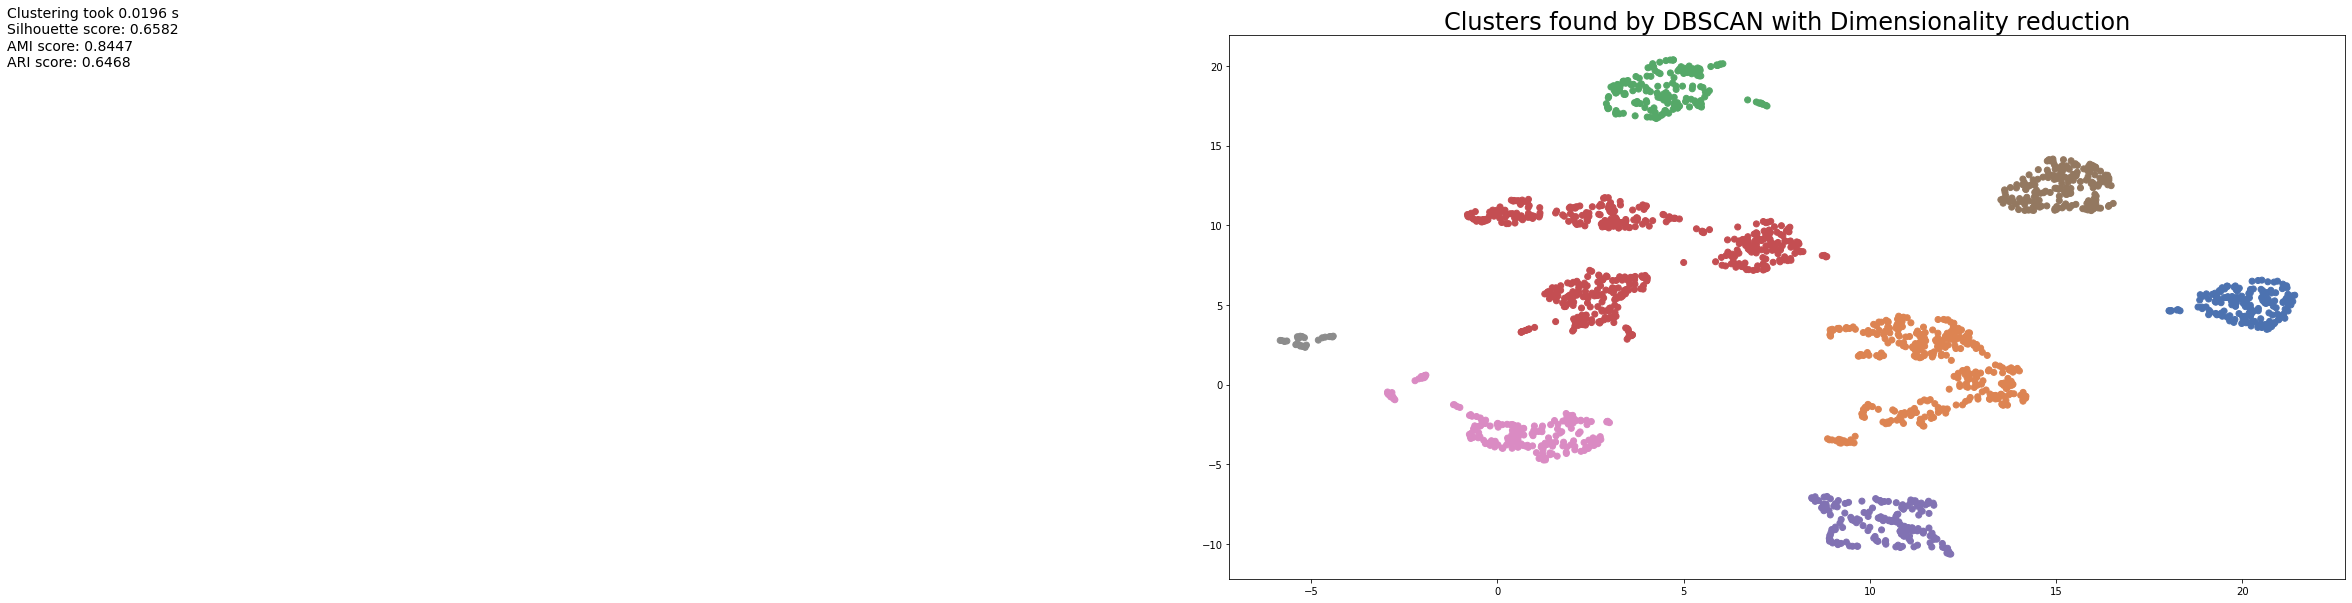

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[0], DBSCAN, (), {'eps': 3, 'min_samples': 5})
dbscan_with_umap_euclidean = [silhouette, ami, ari]

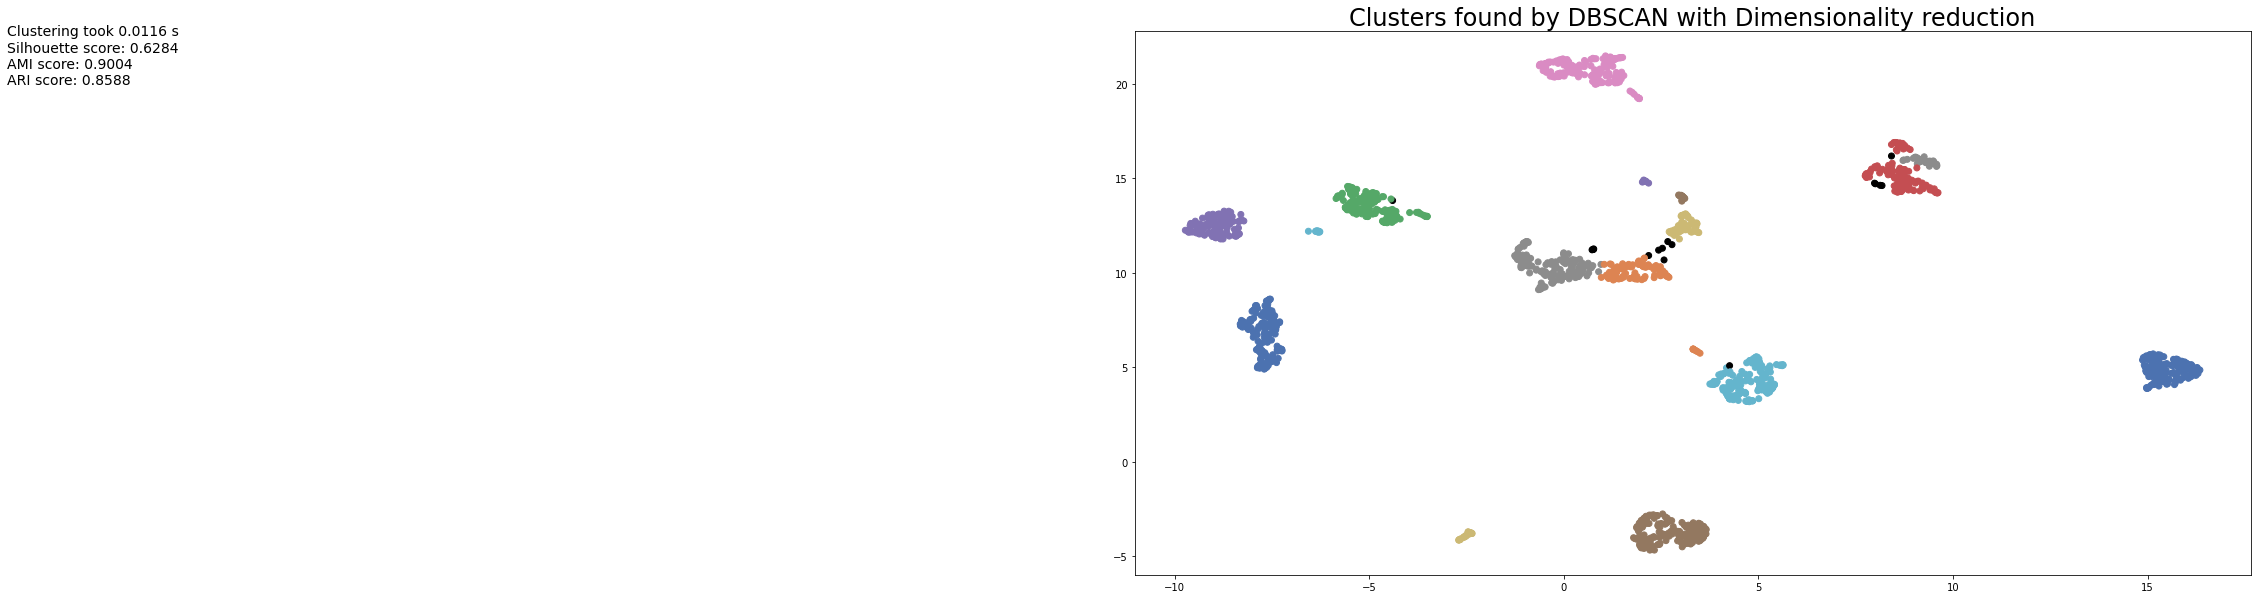

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(umap_data[1], DBSCAN, (), {'eps': 0.3, 'min_samples': 7})
dbscan_with_umap_cosine = [silhouette, ami, ari]

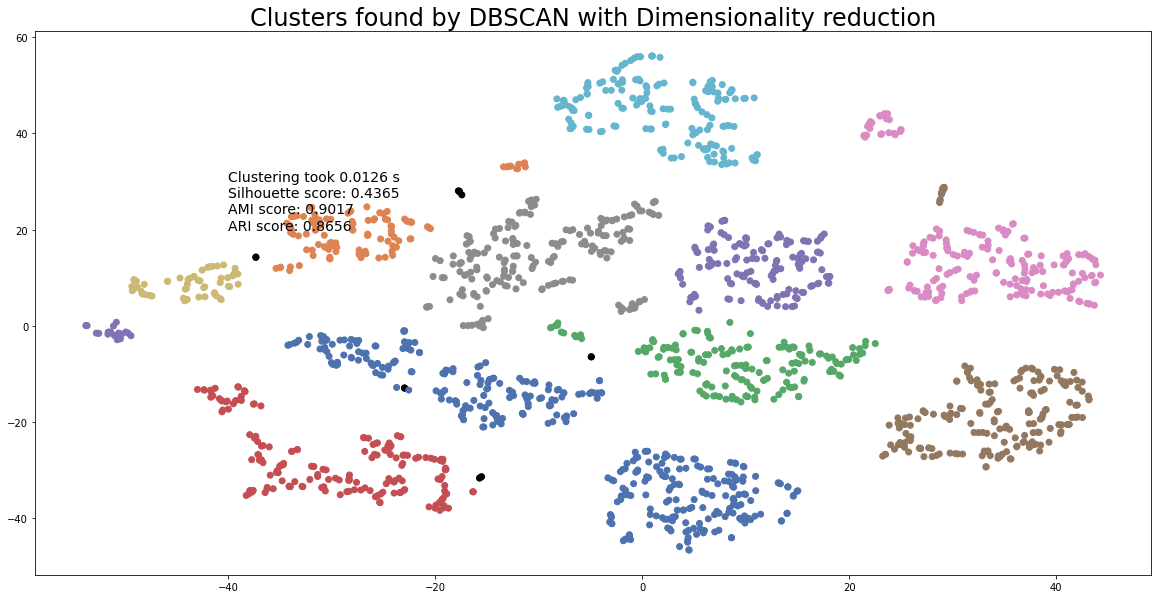

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[0], DBSCAN, (), {'eps': 3, 'min_samples': 7})
dbscan_with_tsne_10 = [silhouette, ami, ari]

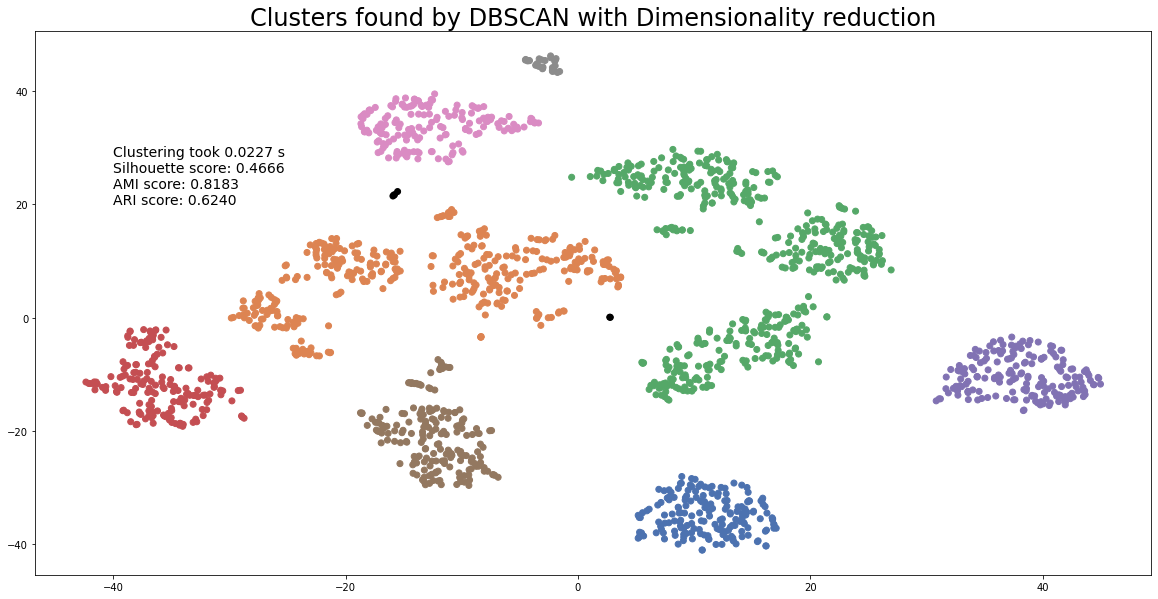

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[1], DBSCAN, (), {'eps': 4, 'min_samples': 7})
dbscan_with_tsne_30 = [silhouette, ami, ari]

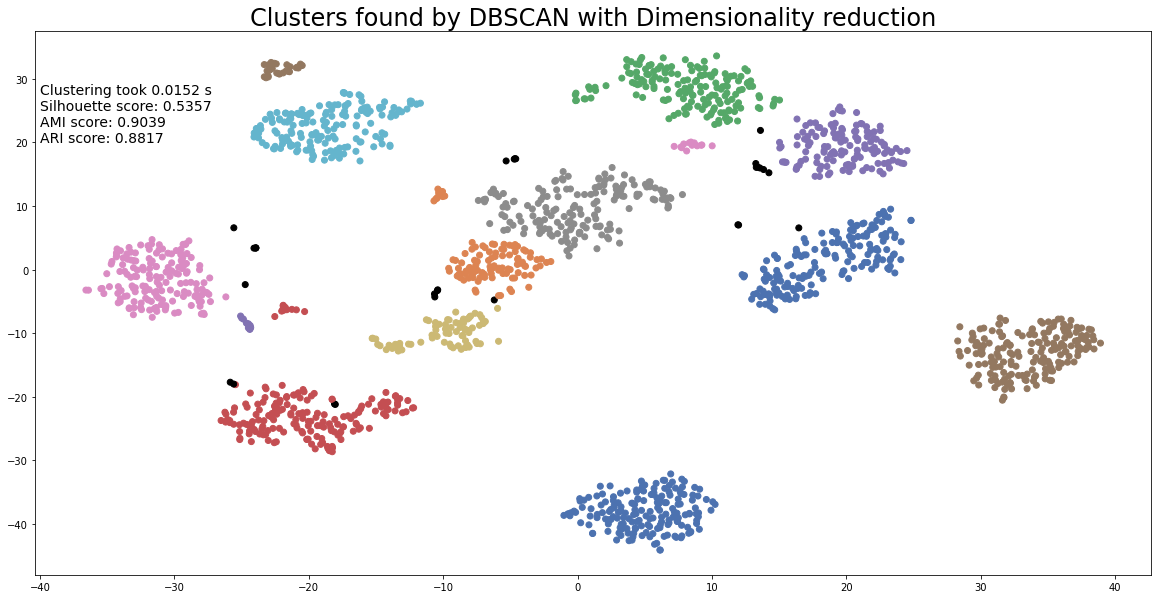

In [ ]:
silhouette, ami, ari = plot_clusters_reduced_data(tsne_data[2], DBSCAN, (), {'eps': 1.8, 'min_samples': 7})
dbscan_with_tsne_50 = [silhouette, ami, ari]

#Висновки

In [ ]:
metric_names = ['Silhouette', 'AMI', 'ARI']
clustering_models = {
    'KMeans_without_dimred': KMeans_without_dimred,
    'KMeans_with_umap_euclidean': KMeans_with_umap_euclidean,
    'KMeans_with_umap_cosine': KMeans_with_umap_cosine,
    'KMeans_with_tsne_10': KMeans_with_tsne_10,
    'KMeans_with_tsne_30': KMeans_with_tsne_30,
    'KMeans_with_tsne_50': KMeans_with_tsne_50,
    'birch_without_dimred': birch_without_dimred,
    'birch_with_umap_euclidean': birch_with_umap_euclidean,
    'birch_with_umap_cosine': birch_with_umap_cosine,
    'birch_with_tsne_10': birch_with_tsne_10,
    'birch_with_tsne_30': birch_with_tsne_30,
    'birch_with_tsne_50': birch_with_tsne_50,
    'agglcust_without_dimred': agglcust_without_dimred,
    'agglcust_with_umap_euclidean': agglcust_with_umap_euclidean,
    'agglcust_with_umap_cosine': agglcust_with_umap_cosine,
    'agglcust_with_tsne_10': agglcust_with_tsne_10,
    'agglcust_with_tsne_30': agglcust_with_tsne_30,
    'agglcust_with_tsne_50': agglcust_with_tsne_50,
    'dbscan_without_dimred': dbscan_without_dimred,
    'dbscan_with_umap_euclidean': dbscan_with_umap_euclidean,
    'dbscan_with_umap_cosine': dbscan_with_umap_cosine,
    'dbscan_with_tsne_10': dbscan_with_tsne_10,
    'dbscan_with_tsne_30': dbscan_with_tsne_30,
    'dbscan_with_tsne_50': dbscan_with_tsne_50,
}

metrics = pd.DataFrame.from_dict(clustering_models, orient='index', columns=metric_names)

In [ ]:
metrics.sort_values(by='Silhouette', ascending=False)


Silhouette       AMI       ARI
KMeans_with_umap_cosine         0.774174  0.907607  0.853567
agglcust_with_umap_cosine       0.774174  0.907607  0.853567
birch_with_umap_cosine          0.773442  0.907530  0.852438
KMeans_with_umap_euclidean      0.701751  0.907095  0.842177
agglcust_with_umap_euclidean    0.701243  0.909369  0.835786
birch_with_umap_euclidean       0.674076  0.927715  0.907016
dbscan_with_umap_euclidean      0.658156  0.844731  0.646807
birch_with_tsne_50              0.654533  0.919301  0.899203
KMeans_with_tsne_50             0.653614  0.904314  0.878437
agglcust_with_tsne_50           0.653063  0.908553  0.884856
dbscan_with_umap_cosine         0.628379  0.900386  0.858759
KMeans_with_tsne_30             0.625191  0.903869  0.879406
birch_with_tsne_30              0.623543  0.907468  0.882899
agglcust_with_tsne_30           0.619265  0.902117  0.870520
dbscan_with_tsne_50             0.535703  0.903932  0.881684
KMeans_with_tsne_10             0.512702  0.810594  0.725964
agglcust_with_tsne_10           0.485904  0.822380  0.723034
birch_with_tsne_10              0.483390  0.823055  0.721457
dbscan_with_tsne_30             0.466557  0.818321  0.623984
dbscan_with_tsne_10             0.436540  0.901701  0.865551
KMeans_without_dimred           0.182409  0.739790  0.667957
birch_without_dimred            0.178497  0.866832  0.794003
agglcust_without_dimred         0.178497  0.866832  0.794003
dbscan_without_dimred           0.093451  0.725599  0.550731

In [ ]:
metrics.sort_values(by='AMI', ascending=False)

Silhouette       AMI       ARI
birch_with_umap_euclidean       0.674076  0.927715  0.907016
birch_with_tsne_50              0.654533  0.919301  0.899203
agglcust_with_umap_euclidean    0.701243  0.909369  0.835786
agglcust_with_tsne_50           0.653063  0.908553  0.884856
KMeans_with_umap_cosine         0.774174  0.907607  0.853567
agglcust_with_umap_cosine       0.774174  0.907607  0.853567
birch_with_umap_cosine          0.773442  0.907530  0.852438
birch_with_tsne_30              0.623543  0.907468  0.882899
KMeans_with_umap_euclidean      0.701751  0.907095  0.842177
KMeans_with_tsne_50             0.653614  0.904314  0.878437
dbscan_with_tsne_50             0.535703  0.903932  0.881684
KMeans_with_tsne_30             0.625191  0.903869  0.879406
agglcust_with_tsne_30           0.619265  0.902117  0.870520
dbscan_with_tsne_10             0.436540  0.901701  0.865551
dbscan_with_umap_cosine         0.628379  0.900386  0.858759
agglcust_without_dimred         0.178497  0.866832  0.794003
birch_without_dimred            0.178497  0.866832  0.794003
dbscan_with_umap_euclidean      0.658156  0.844731  0.646807
birch_with_tsne_10              0.483390  0.823055  0.721457
agglcust_with_tsne_10           0.485904  0.822380  0.723034
dbscan_with_tsne_30             0.466557  0.818321  0.623984
KMeans_with_tsne_10             0.512702  0.810594  0.725964
KMeans_without_dimred           0.182409  0.739790  0.667957
dbscan_without_dimred           0.093451  0.725599  0.550731

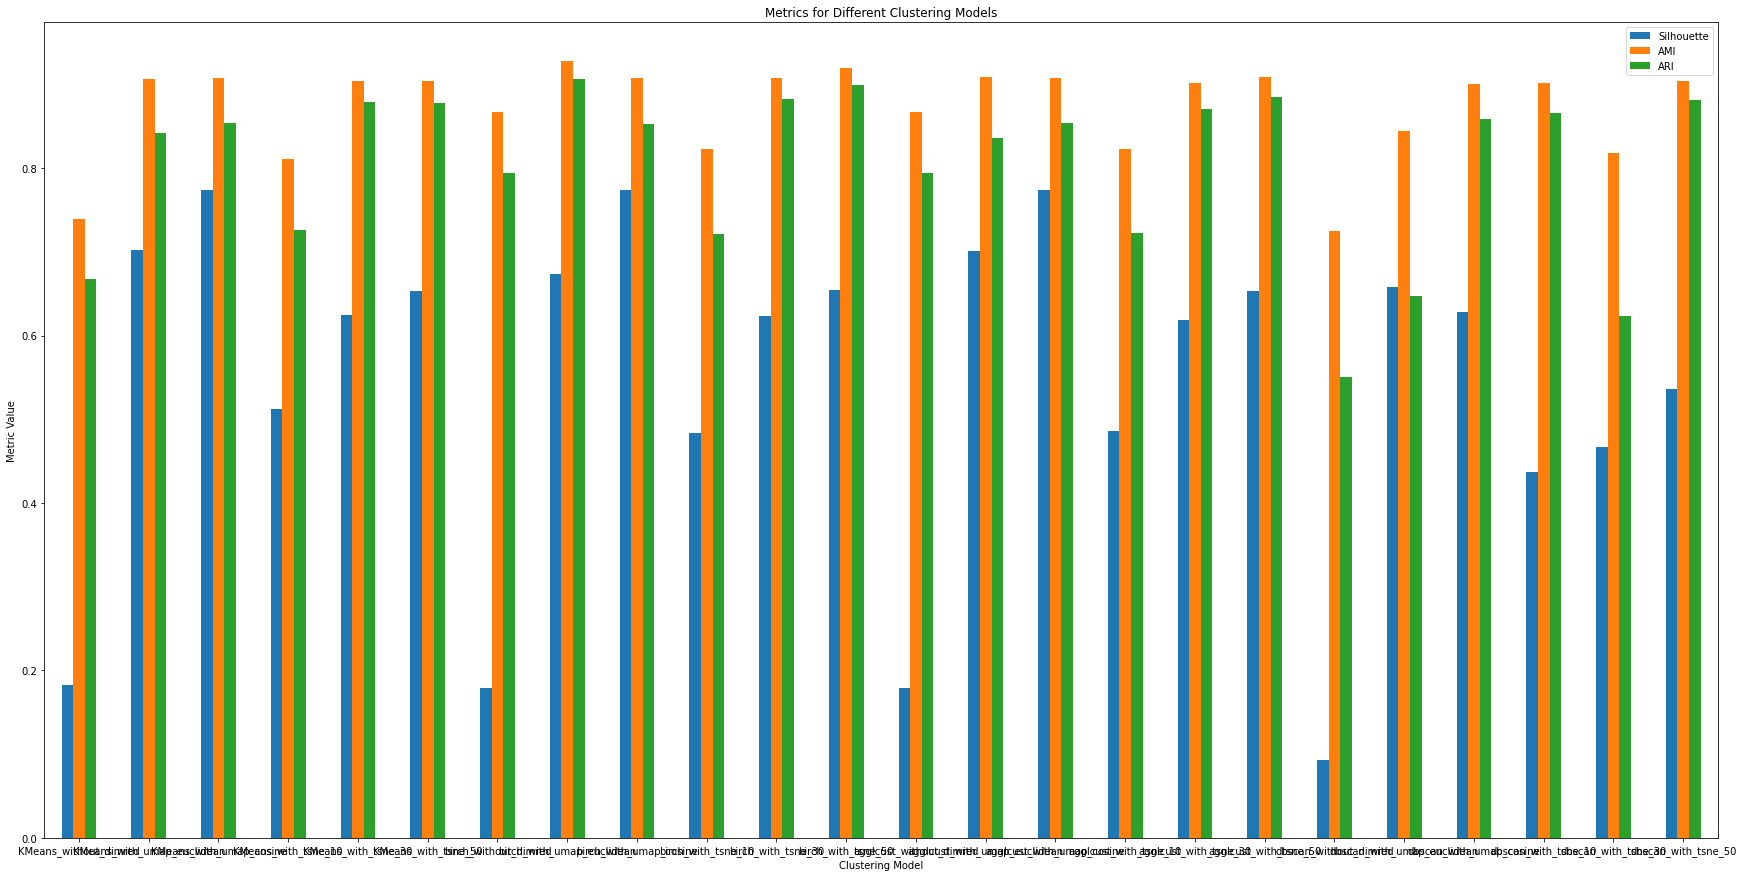

In [ ]:
metrics.plot(kind='bar', rot=0, figsize=(30, 15))
plt.xlabel('Clustering Model')
plt.ylabel('Metric Value')
plt.title('Metrics for Different Clustering Models')
plt.show()

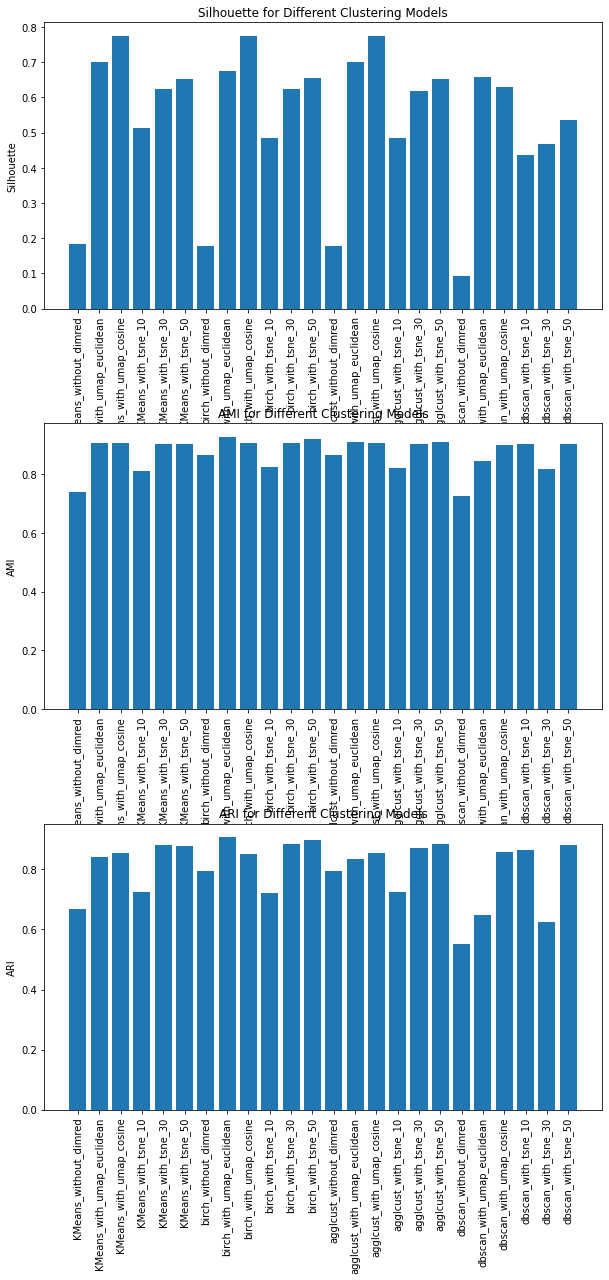

In [ ]:
fig, axs = plt.subplots(nrows=len(metric_names), figsize=(10, 20))
fig.subplots_adjust(hspace=0.4)

for i, metric_name in enumerate(metric_names):
    metric_values = metrics[metric_name].values
    xticks = np.arange(len(clustering_models))
    axs[i].bar(xticks, metric_values)
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(clustering_models.keys(), rotation=90)
    axs[i].set_ylabel(metric_name)
    axs[i].set_title(f'{metric_name} for Different Clustering Models')

plt.show()

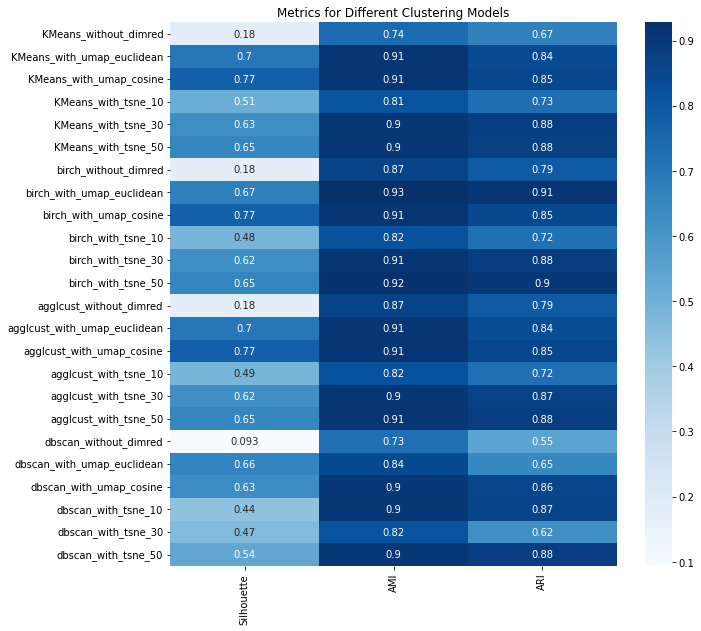

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=metrics, annot=True, cmap='Blues', ax=ax)
ax.set_title('Metrics for Different Clustering Models')
plt.xticks(rotation=90)
plt.show()


- Про якість кластеризації на даних без таргету можна робити висновки за метрикою Silhouette
- Перед застовуванням кластеризації потрібно обовʼязково зменшити розмірність самого датасету (ті самі моделі кластеризації на датасеті без зменшення розмірності дали найгірші значення метрики - приблизно 0.1-0.2)
- зменшення розмірності з umap + кластеризація дали найвищі показники метрики, tsne - на 0.1-0.2 менші показники)

Зменшення розмірності покращує результати, бо:
1. Збільшує відстань між обʼєктами, робить їх менш взаємозалежними і цим покращує ефективність кластеризації (оскільки знижує можливість призначення одного обʼєкта до кількох кластерів водночас)
2. Зменшує кількість фічей (feature space) та цим мінімізує вплив шуму даних, може виключити/агрегувати потенційно нерелевантні фічі. Також із меншою кількістю фічей легше виявити патерни й закономірності
3. Оптимізовує розріджені дані
Крім цього,  багатовимірні дані потребують більше обчислень (дій), задіяної памʼяті та відповідно часу на обробку, які можна оптимізувати, застосувавши зменшення розмірності.

- Підхід до вибору кластеризації та зменшення розмірності залежить від мети аналізу, типу даних та нашого рівня знань про дані, із якими працюємо:
1) використовуємо експертні знання у сфері, робимо гіпотези й перевіряємо їх шляхом експериментів із різними методами та порівнянюємо результати
2) почати з K-means варто тоді, коли приблизно розумієш кількісь кластерів. (або ж спробувати виявити приблизне число кластерів через візуалізацію, зменшивши розмірність за допомогою umap, tsne. також можна застосувати DBSCAN, що знаходить ділянки з високою густотою даних, або агломеративну кластеризацію, що послідовно обʼєднує окремі обʼєкти у більші групи)

Silhouette:
- під час застосування одного методу кластеризації після зменшення розмірності даних отримуємо значно вищі показники цієї метрики (до прибл. + 0.5)
- на мою думку, порівняно з  AMI та ARI має перевагу в реальних задачах, де працюємо із нерозміченою вибіркою даних
- вона враховує критерії  згрупованість та віддаленості точок та варіюється в діапазоні від -1 до 1, тому є досить зрозумілою для інтерпретації якості кластеризації


Adjusted Mutual Information (AMI)та Adjusted Rand Index можна застосувати тільки з розміченими даними. Отримала трохи вищі показники метрик після зменшення розмірності даних.
- AMI порівнює реальний розподіл із спрогнозованим кластеризацією

